# **Predicting Loan Default: A Comparative Study of ML Models**

## **I. Preface**

### **i. Context**

A major proportion of retail bank profit comes from interests in the form of home loans. These loans are borrowed by regular income/high-earning customers. Banks are most fearful of defaulters, as bad loans (NPA) usually eat up a major chunk of their profits. Therefore, it is important for banks to be judicious while approving loans for their customer base.

The approval process for the loans is multifaceted. Through this process, the bank tries to check the creditworthiness of the applicant on the basis of a manual study of various aspects of the application. The entire process is not only eﬀort-intensive but also prone to wrong judgment/approval owing to human error and biases.

There have been attempts by many banks to automate this process by using heuristics. But with the advent of data science and machine learning, the focus has shifted to building machines that can learn this approval process and make it free of biases and more eﬃcient. At the same time, one important thing to keep in mind is to make sure that the machine does not learn the biases that previously crept in because of the human approval process.

### **ii. Problem Statement**

A bank's consumer credit department aims to simplify the decision-making process for home equity lines of credit to be accepted. To do this, they will adopt the Equal Credit Opportunity Act's guidelines to establish an empirically derived and statistically sound model for credit scoring. The model will be based on the data obtained via the existing loan underwriting process from recent applicants who have been given credit. The model will be built from predictive modeling techniques, but the model created must be interpretable enough to provide a justification for any adverse behavior (rejections).

### **iii. Objective**

Build a classification model to predict clients who are likely to default on their loan and give recommendations to the bank on the important features to consider while approving a loan.

### **iv. Key Questions**

- What is the shape of the dataset? Are there duplicates or missing values? If so, how do we treat the dataset.
- What is the meaning of each column (variable)? Are there any columns to drop? Are there any hidden variable/ features?
- What's the relation between the variables?
- What models could be applied?

### **v. Data Dictionary**

The **Home Equity dataset (HMEQ)** contains baseline and loan performance information for recent home equity loans.  

The target variable is **`BAD`**, a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent.  

There are **12 input variables** registered for each applicant:

- **BAD**:  
  - `1` = Client defaulted on loan  
  - `0` = Loan repaid  

- **LOAN**: Amount of loan approved  

- **MORTDUE**: Amount due on the existing mortgage  

- **VALUE**: Current value of the property  

- **REASON**: Reason for the loan request  
  - `HomeImp` = Home improvement  
  - `DebtCon` = Debt consolidation (taking out a new loan to pay off other liabilities and consumer debts)  

- **JOB**: Type of job the loan applicant has (e.g., manager, self-employed, etc.)  

- **YOJ**: Years at present job  

- **DEROG**: Number of major derogatory reports (serious delinquency or late payments)  

- **DELINQ**: Number of delinquent credit lines  
  > A line of credit becomes delinquent when a borrower does not make the minimum required payments **30–60 days past due**.  

- **CLAGE**: Age of the oldest credit line in months  

- **NINQ**: Number of recent credit inquiries  

- **CLNO**: Number of existing credit lines  

- **DEBTINC**: Debt-to-income ratio  
  > (All monthly debt payments ÷ gross monthly income).  
  This number measures a borrower’s ability to manage monthly payments to repay the loan.  


### **vi. Liberary Import**

In [163]:
# ----- Overall -----
# Ignore warnings.
import warnings
warnings.filterwarnings("ignore")

# ----- I. Initial Data Treatment -----
# Implement data manipulation.
import numpy as np
import pandas as pd
# Remove the limit for the number of displayed columns.
pd.set_option("display.max_columns", None)
# Set the limit for the number of displayed rows.
pd.set_option("display.max_rows", 200)
# Set the precision of floating numbers to 5 decimal points.
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# ---- III. Exploratory Data Analysis (EDA) ----
# Implement data data visualization.
import matplotlib.pyplot as plt
import seaborn as sns
# Import skew.
from scipy.stats import skew

# ---- IV. Modelling ----
# Implement data processing.
from sklearn.model_selection import train_test_split
# Implement model evaluation.
from sklearn.metrics import confusion_matrix, classification_report, f1_score
# Import metrics to evaluate the model
from sklearn import metrics
# Tune different models.
from sklearn.model_selection import GridSearchCV
# Import different metric scores.
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)
# Import classifiers.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Import visualiztion tools.
from sklearn import tree

## **II. Initial Data Treatment**

### **i. Preparations**

In [18]:
# Load the dataset into a DataFrame.
hm = pd.read_csv("hmeq.csv")
# Create an operatable copy of the DataFrame.
data = hm.copy()

### **ii. Data Overview**

In [20]:
# Show the first five row.
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.00000,39025.00000,HomeImp,Other,10.50000,0.00000,0.00000,94.36667,1.00000,9.00000,NaN
1,1,1300,70053.00000,68400.00000,HomeImp,Other,7.00000,0.00000,2.00000,121.83333,0.00000,14.00000,NaN
2,1,1500,13500.00000,16700.00000,HomeImp,Other,4.00000,0.00000,0.00000,149.46667,1.00000,10.00000,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.00000,112000.00000,HomeImp,Office,3.00000,0.00000,0.00000,93.33333,0.00000,14.00000,NaN


In [21]:
# Show the last five rows.
data.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.00000,90185.00000,DebtCon,Other,16.00000,0.00000,0.00000,221.80872,0.00000,16.00000,36.11235
5956,0,89000,54576.00000,92937.00000,DebtCon,Other,16.00000,0.00000,0.00000,208.69207,0.00000,15.00000,35.85997
5957,0,89200,54045.00000,92924.00000,DebtCon,Other,15.00000,0.00000,0.00000,212.27970,0.00000,15.00000,35.55659
5958,0,89800,50370.00000,91861.00000,DebtCon,Other,14.00000,0.00000,0.00000,213.89271,0.00000,16.00000,34.34088
5959,0,89900,48811.00000,88934.00000,DebtCon,Other,15.00000,0.00000,0.00000,219.60100,0.00000,16.00000,34.57152


In [22]:
# Show the shape of the original dataset.
data.shape

(5960, 13)

In [23]:
# Show the data type of each column.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [24]:
# Conut duplicates.
data.duplicated().sum()

0

In [25]:
# Count missing values.
data.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [26]:
# Calculate the percentage of missing values.
(data.isnull().sum() / data.shape[0] * 100).round(2).astype(str) + '%'

BAD          0.0%
LOAN         0.0%
MORTDUE     8.69%
VALUE       1.88%
REASON      4.23%
JOB         4.68%
YOJ         8.64%
DEROG      11.88%
DELINQ      9.73%
CLAGE       5.17%
NINQ        8.56%
CLNO        3.72%
DEBTINC    21.26%
dtype: object

In [27]:
# Count unique values.
data.nunique()

BAD           2
LOAN        540
MORTDUE    5053
VALUE      5381
REASON        2
JOB           6
YOJ          99
DEROG        11
DELINQ       14
CLAGE      5314
NINQ         16
CLNO         62
DEBTINC    4693
dtype: int64

🔬 **Observations**

- 👓 **Structure Overview**
    - **Shape**: `(5960, 13)` → 5960 rows and 13 columns.
    - **Target variable**: `BAD` (binary: 0 = repaid, 1 = defaulted).
    - **Features**: 12 predictor variables (mix of numeric and categorical).
    - **Data types**:
      - `int64`: 2 columns (`BAD`, `LOAN`)
      - `float64`: 9 columns (e.g., `MORTDUE`, `VALUE`, `DEBTINC`)
      - `object`: 2 columns (`REASON`, `JOB`)

-  ☑️ **Data Quality**
    - **No duplicate rows**.
    - **Missing values present** in multiple columns:
        - **High missingness**: `DEBTINC` (21%). Needs careful imputation (median or model-based) + flag.  
        - **Moderate missingness**: `DEROG`, `DELINQ`, `YOJ`, `MORTDUE`, `NINQ` (9–12%). Imputation + missing flags recommended.  
        - **Low missingness**: `CLAGE`, `CLNO`, `JOB`, `REASON`, `VALUE` (≤5%). Simple imputation is sufficient.  
        - **No missing values**: Target `BAD` and predictor `LOAN`.
    - **Action plan**
        - **Numeric (continuous)**: Median imputation (`DEBTINC`, `MORTDUE`, `VALUE`, `CLAGE`, `CLNO`, `YOJ`, `NINQ`). 
        - **Numeric (count-like)**: Impute `DEROG`, `DELINQ` with 0 (interpreted as no derogatory/delinquency) or median.
        - **Categorical**: Add `"Unknown"` category for `JOB` and `REASON`.
        - **Missing flags**: Create binary indicators for `DEBTINC`, `DEROG`, `DELINQ`, `YOJ`, `MORTDUE`.

- 🦄 **Uniqueness & Variable Characteristics**
    - **Categorical variables**:  
      - `BAD`: 2 unique values (balanced or imbalanced needs to be checked later).  
      - `REASON`: 2 unique values (HomeImp, DebtCon).  
      - `JOB`: 6 unique values (job categories).  
    
    - **Continuous / Numeric variables**:  
      - `LOAN`: 540 unique values (loan amounts).  
      - `MORTDUE`: 5053 unique values.  
      - `VALUE`: 5381 unique values.  
      - `YOJ`: 99 unique values (years on job).  
      - `DEROG`: 11 unique values.  
      - `DELINQ`: 14 unique values.  
      - `CLAGE`: 5314 unique values (credit age, high variability).  
      - `NINQ`: 16 unique values (recent inquiries).  
      - `CLNO`: 62 unique values (credit lines).  
      - `DEBTINC`: 4693 unique values (continuous ratio).

---

⚠️ **Key Takeaways**

- Dataset is relatively clean (no duplicates), but **missing values are significant**, especially in `DEBTINC`, `DEROG`, `YOJ`, and `MORTDUE`.  
- Mix of **categorical** (nominal) and **continuous** (mostly financial) features.  
- High cardinality in numeric features (e.g., `CLAGE`, `MORTDUE`, `VALUE`) suggests they are continuous rather than discrete.  
- `BAD` is suitable as a binary classification target.  

### **iii. Data Summary and Analysis**

Converting "objects" to "category" will reduce the data space for dataframe storage.

In [31]:
# Make a list of categorical variables.
cat_cols = data.select_dtypes(['object']).columns.tolist()
# Add target variable to categorical variable list.
cat_cols.append('BAD')
# Make a list of numerical variables.
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
# Remove target variable.
num_cols = num_cols.drop('BAD')
# Iterate each column from the list.
for col in cat_cols:
    data[col] = data[col].astype('category')
# Recheck the data type of each column.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


In [32]:
# Check summary for categorical data.
data.describe(include=['category']).T

,count,unique,top,freq
BAD,5960,2,0,4771
REASON,5708,2,DebtCon,3928
JOB,5681,6,Other,2388


In [33]:
# Check summary for numerical data.
data.describe(include=['int64', 'float64']).T

,count,mean,std,min,25%,50%,75%,max
LOAN,5960.00000,18607.96980,11207.48042,1100.00000,11100.00000,16300.00000,23300.00000,89900.00000
MORTDUE,5442.00000,73760.81720,44457.60946,2063.00000,46276.00000,65019.00000,91488.00000,399550.00000
VALUE,5848.00000,101776.04874,57385.77533,8000.00000,66075.50000,89235.50000,119824.25000,855909.00000
YOJ,5445.00000,8.92227,7.57398,0.00000,3.00000,7.00000,13.00000,41.00000
DEROG,5252.00000,0.25457,0.84605,0.00000,0.00000,0.00000,0.00000,10.00000
DELINQ,5380.00000,0.44944,1.12727,0.00000,0.00000,0.00000,0.00000,15.00000
CLAGE,5652.00000,179.76628,85.81009,0.00000,115.11670,173.46667,231.56228,1168.23356
NINQ,5450.00000,1.18606,1.72867,0.00000,0.00000,1.00000,2.00000,17.00000
CLNO,5738.00000,21.29610,10.13893,0.00000,15.00000,20.00000,26.00000,71.00000
DEBTINC,4693.00000,33.77992,8.60175,0.52450,29.14003,34.81826,39.00314,203.31215


🔬 **Observations**

- **Categorical Variable Summary**
    - **BAD**
        - Total count: 5960 (no missing values).  
        - Distribution: `0` (loan repaid) is most frequent with 4771 cases (~80%).  
        - Imbalance likely: dataset is skewed toward non-default clients.  
    - **REASON**
        - Count: 5708 (252 missing).  
        - 2 categories: **DebtCon** (most common, 3928 cases ~69%) and **HomeImp**.  
        - Indicates most applicants take loans for debt consolidation.  
    - **JOB**
        - Count: 5681 (279 missing).  
        - 6 categories, with **Other** being most frequent (2388 cases ~42%).  
        - Suggests a large portion of applicants fall outside standard job titles.

- **Numerical Variable Summary**
    - **LOAN**
        - Mean ≈ 18,608; Range: 1,100 → 89,900.  
        - Loan amounts are moderately spread (std ≈ 11,200).  
        - Most loans between 11,100 (Q1) and 23,300 (Q3).  
    - **MORTDUE**
        - Mean ≈ 73,761; wide spread (std ≈ 44,458).  
        - Range: 2,063 → 399,550.  
        - Median ~65,019, suggesting right-skewness due to very high mortgages.  
    - **VALUE**
        - Mean ≈ 101,776; Range: 8,000 → 855,909.  
        - Median ~89,236, with large variability (std ≈ 57,386).  
        - Strong right-skew due to a few high-value properties.  
    - **YOJ (Years on Job)**
        - Mean ≈ 9 years; Median = 7.  
        - Range: 0 → 41.  
        - Distribution is skewed with many applicants early in their career.  
    - **DEROG**
        - Mean ≈ 0.25; Median = 0.  
        - Most applicants have no derogatory reports.  
        - Maximum = 10 indicates outliers.  
    - **DELINQ**
        - Mean ≈ 0.45; Median = 0.  
        - Most applicants are not delinquent.  
        - Maximum = 15 shows a few with extreme delinquency.  
    - **CLAGE (Oldest Credit Line in Months)**
        - Mean ≈ 180 months (~15 years).  
        - Median = 173 months.  
        - Range: 0 → 1168 months (~97 years) — indicates data entry anomalies/outliers.  
    - **NINQ (Recent Credit Inquiries)**
        - Mean ≈ 1.19; Median = 1.  
        - Majority between 0–2.  
        - Max = 17 shows extreme cases.  
    - **CLNO (Number of Credit Lines)**
        - Mean ≈ 21; Median = 20.  
        - Range: 0 → 71.  
        - Values seem reasonable, but some have unusually high credit lines.  
    - **DEBTINC (Debt-to-Income Ratio)**
        - Mean ≈ 33.8%; Median ≈ 34.8%.  
        - Typical range: 29% (Q1) → 39% (Q3).  
        - Maximum = 203% indicates serious outliers or financial stress.  

---

⚠️ **Key Takeaways**
- **Categorical features** show imbalance:
  - Target `BAD` is skewed toward repaid loans (class imbalance to consider for modeling).  
  - Most loans are for **debt consolidation**, and **Other** dominates job categories.  
- **Numeric features** show:
  - High skewness in `MORTDUE`, `VALUE`, `DEBTINC` → may need **log transformation** or **robust scaling**.  
  - Outliers in `CLAGE`, `DELINQ`, `DEROG`, and `DEBTINC` → need careful handling (e.g., capping, transformations).  
  - `DEROG` and `DELINQ` are highly zero-inflated, meaning most applicants are clean but a few are extreme.  
- Overall, preprocessing steps should include **handling outliers**, **log/scale transformations**, and **class imbalance techniques (SMOTE/weighting)**.  

## **III. Exploratory Data Analysis (EDA)**

### **i. Univariate Analysis**

#### **1. Numerical Variables**

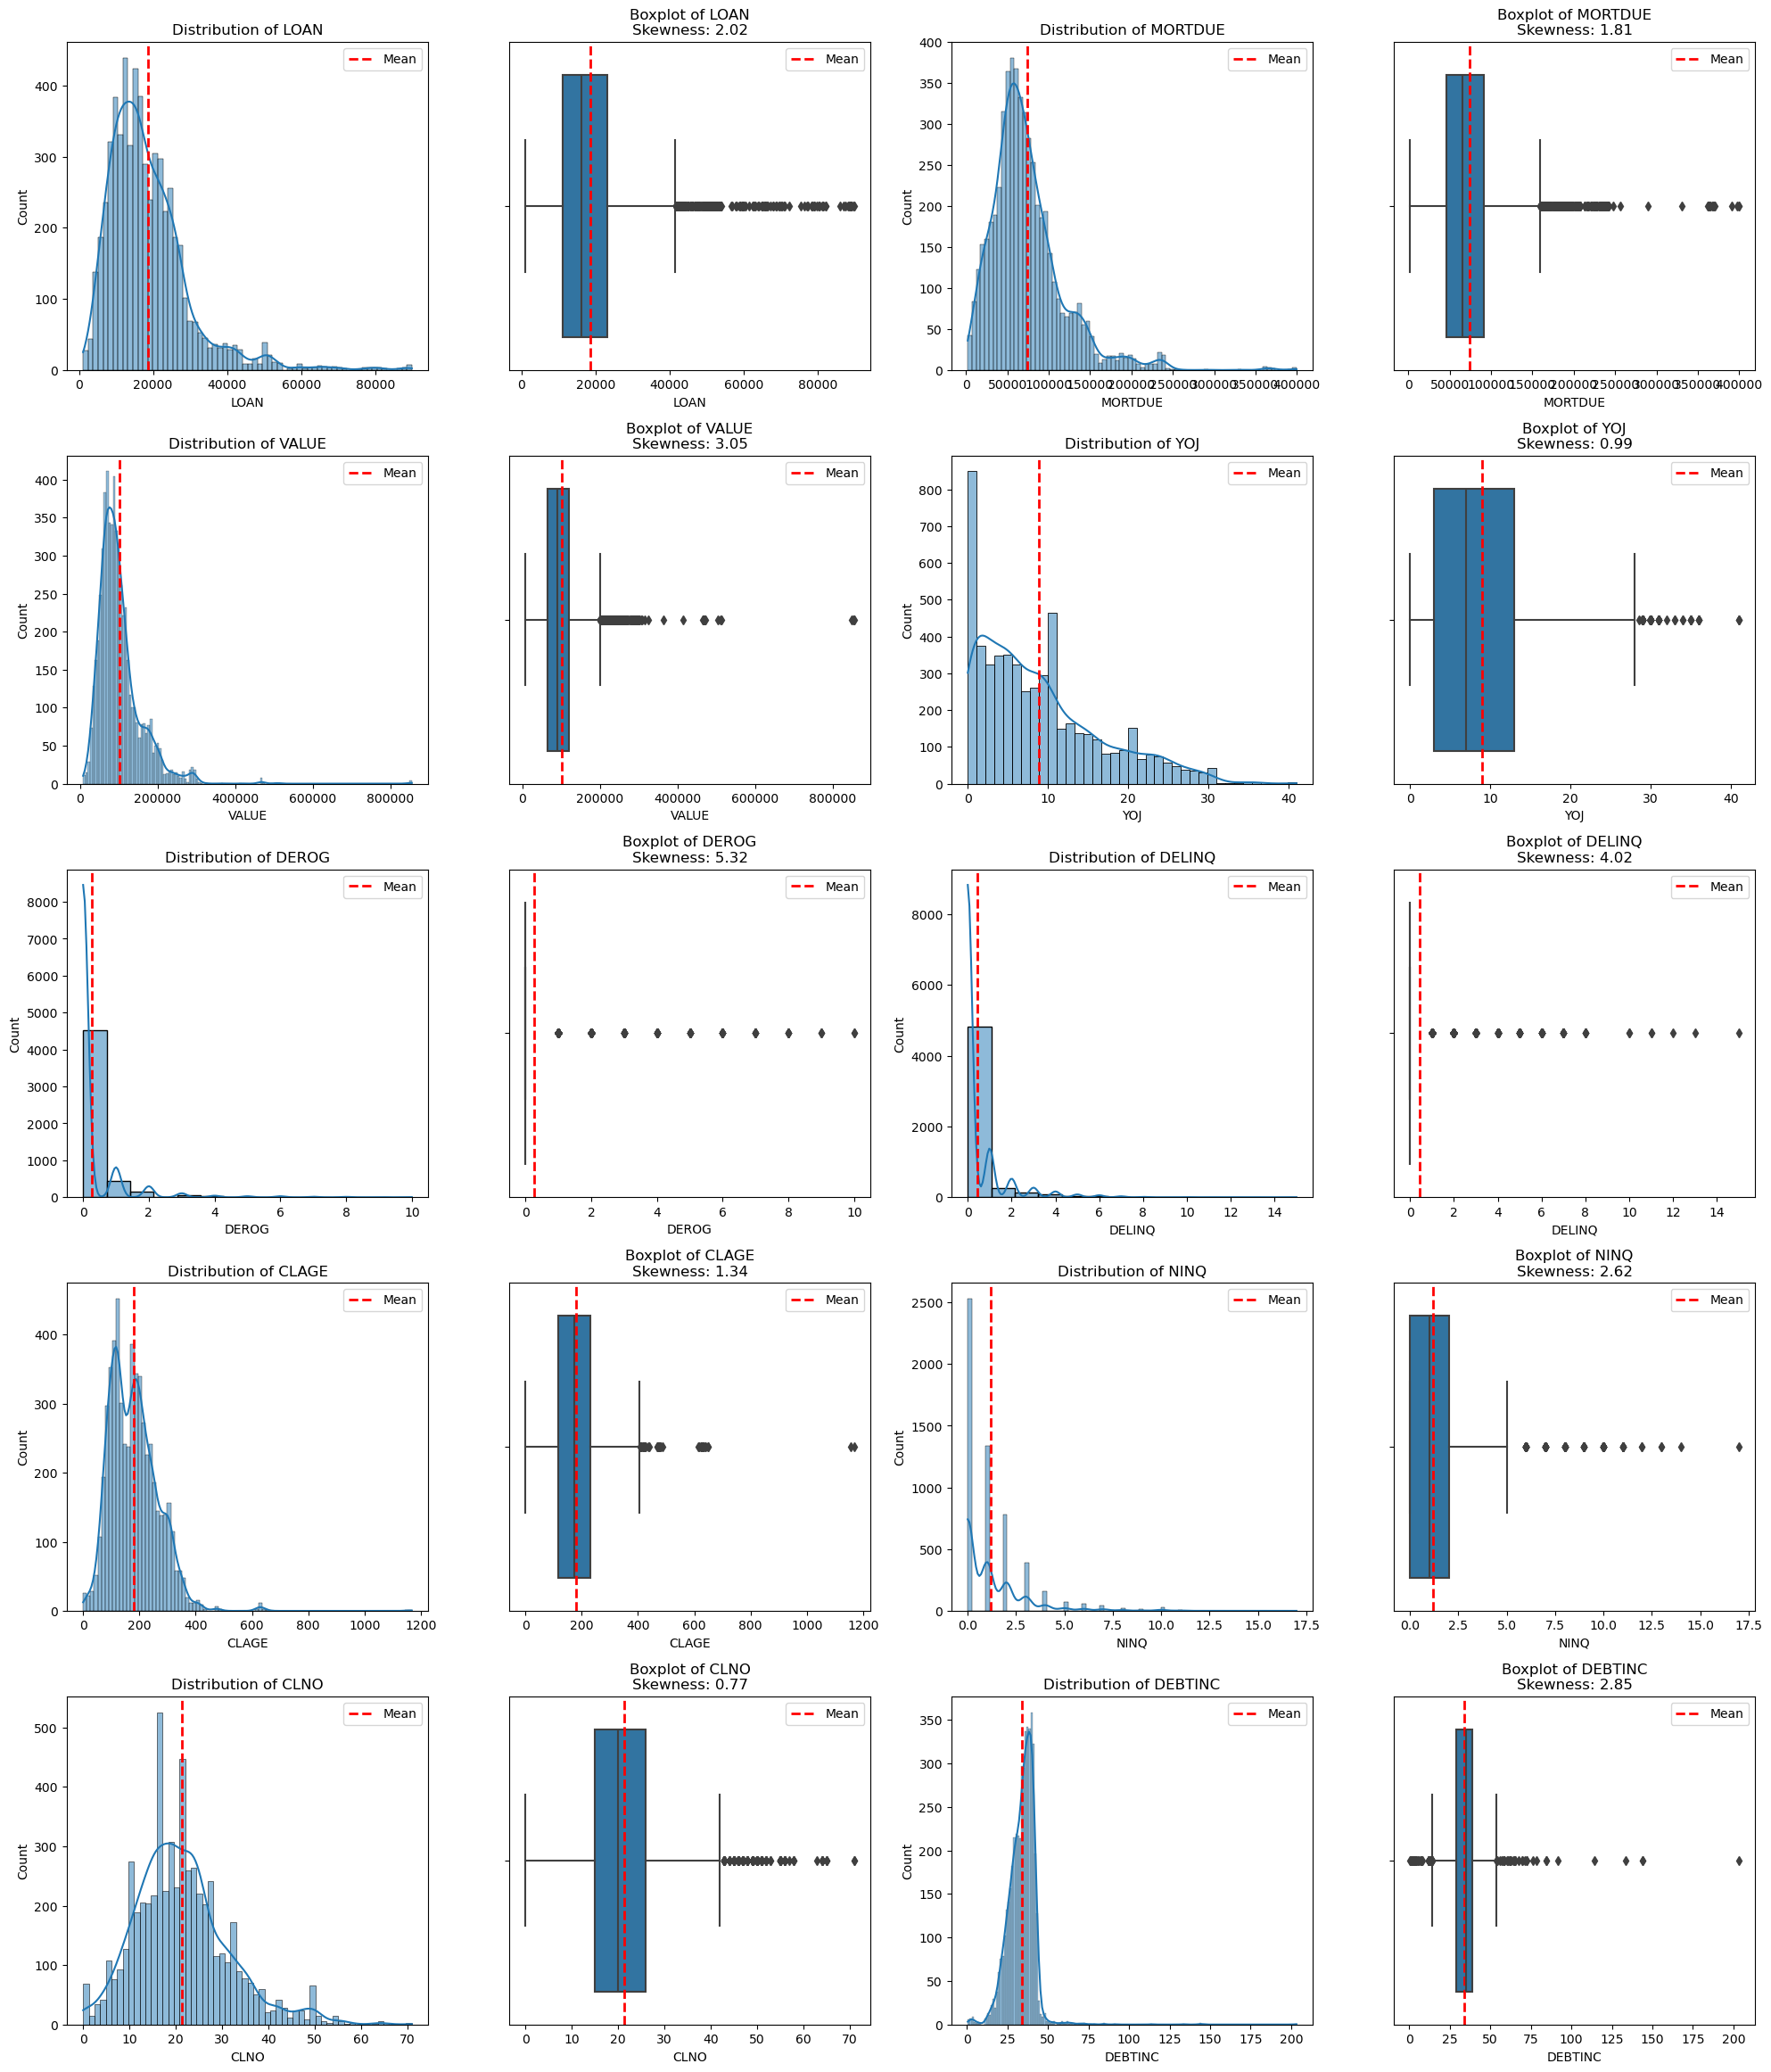

In [38]:
def plot_histogram_and_boxplot(df, cols):
    """
    Draw a histogram and a boxplot for each of the selected numerical variables in the given DataFrame.

    Parameters
    ----------
    df : pandas.core.frame.DataFrame
        Original DataFrame.
    cols : list
        A list of numerical variables (columns).

    Returns
    -------
    None.

    """
    
    # Set the figure size.
    plt.figure(figsize=(20, 60))
    # Iterate each column from the original dataset.
    for i, col in enumerate(cols, 1):

        # -------- Value Print -------
        # print(f"\n=== {col} ===")
        # print(df[col].describe())
        # print(f"Missing values: {df[col].isna().sum()}")
        
        # -------- Histogram subplot --------
        # Set the first subplot position (an odd position).
        plt.subplot(len(df.columns), 4, 2 * i - 1)
        # Draw the histogram.
        sns.histplot(df[col], kde=True)
        # Draw a red dash line of the average value.
        plt.axvline(df[col].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
        # Set the title.
        plt.title(f'Distribution of {col}')
        # Set the legend.
        plt.legend()
    
        # -------- Boxplot subplot --------
        # Set the second subplot position (an even position).
        plt.subplot(len(df.columns), 4, 2 * i)
        # Draw the boxplot.
        sns.boxplot(x=df[col])
        # Draw a red dash line of the average value.
        plt.axvline(df[col].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
        # Compute skewness.
        sk_value = skew(df[col].dropna())
        # Set the title and add skewness as text annotation.
        plt.title(f'Boxplot of {col}\nSkewness: {sk_value:.2f}')
        # Set the legend.
        plt.legend()
    
    # Adjust spacing to prevent overlap between subplots.
    plt.tight_layout()
    # Show all plots.
    plt.show()

# Plot numerical variables.
plot_histogram_and_boxplot(data, num_cols)

🔬 **Observations**

- **LOAN**
    - No missing values.
    - Loan amounts range from **1,100** to **89,900**.
    - Median loan amount is around **16,300**, with a mean of **18,608**, suggesting a slightly right-skewed distribution.
    - 75% of loans are **≤ 23,300**.

- **MORTDUE**
    - **518 missing values**.
    - Mortgage due ranges from **2,063** to **399,550**.
    - Median is **65,019**, mean is **73,761** (right-skewed).
    - 75% of mortgages are **≤ 91,488**.

- **VALUE**
    - **112 missing values**.
    - Property values range from **8,000** to **855,909**.
    - Median is **89,236**, mean is **101,776** (right-skewed due to high maximum).
    - 75% of properties are **≤ 119,824**.

- **YOJ (Years on Job)**
    - **515 missing values**.
    - Ranges from **0 to 41 years**.
    - Median is **7 years**, mean is **8.9 years**.
    - Most applicants have less than **13 years** on the job.

- **DEROG (Number of Major Derogatory Reports)**
    - **708 missing values**.
    - Most values are **0**, mean is only **0.25**.
    - Maximum is **10**, but 75% have **0 derogatory reports**.

- **DELINQ (Number of Delinquent Credit Lines)**
    - **580 missing values**.
    - Median is **0**, mean is **0.45**.
    - Most applicants have no delinquencies, but extreme values go up to **15**.

- **CLAGE (Age of Oldest Credit Line, in Months)**
    - **308 missing values**.
    - Ranges from **0 to 1168 months** (~97 years, possibly data error or unusual cases).
    - Median is **173 months** (~14 years), mean is **180 months**.
    - Distribution is fairly spread, but mostly under **231 months** (~19 years).

- **NINQ (Number of Recent Credit Inquiries)**
    - **510 missing values**.
    - Median is **1**, mean is **1.19**.
    - Most values between **0–2**, but outliers up to **17**.

- **CLNO (Number of Credit Lines)**
    - **222 missing values**.
    - Median is **20**, mean is **21.3**.
    - Most applicants have **15–26 credit lines**.
    - Maximum is **71**, showing some extreme cases.

- **DEBTINC (Debt-to-Income Ratio)**
    - **1267 missing values** (highest among variables).
    - Median is **34.8%**, mean is **33.8%**.
    - Typical range is **29–39%**.
    - Outliers exist up to **203%**, which may need cleaning or special handling.

#### **2. Categorical Variables**

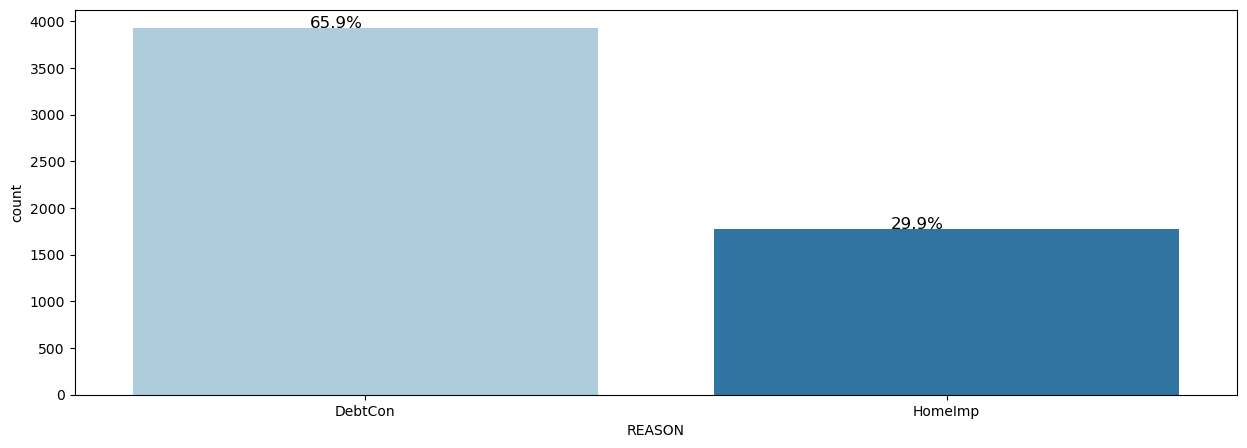

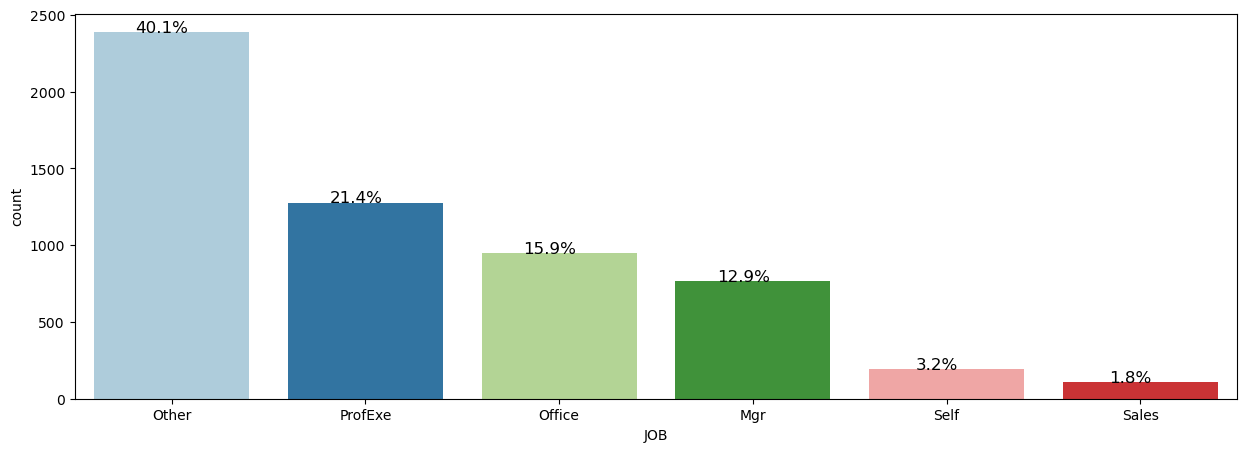

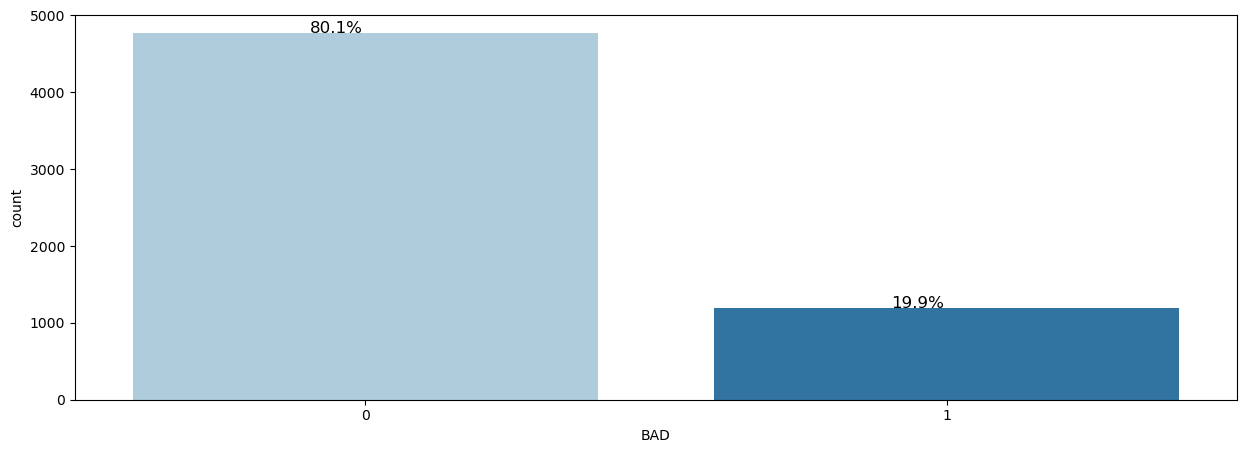

In [41]:
def plot_category_percentage(df, cols):
    """
    Create a bar plot for each selected categorical variable in the given DataFrame. The label on each bar should display the percentage of each unique category relative to the total number of entries.

    Parameters
    ----------
    df : pandas.core.frame.DataFrame
        Original DataFrame.
    cols : list
        A list of categorical variables (columns).

    Returns
    -------
    None.

    """
    
    # Iterate each column from the original dataset.
    for i, col in enumerate(cols, 1):
        # Count the number of entires under this column.
        total = len(data[col])
        # Set the figure size.
        plt.figure(figsize=(15, 5))
        # Draw a countplot.
        ax = sns.countplot(data=data, x=col, palette='Paired', order=data[col].value_counts().index)
        # Iterate each bar from the plot.
        for patch in ax.patches:
            # Calculate the percentage of this bar to the total entries.
            percentage = '{:.1f}%'.format(100 * patch.get_height() / total)
            # Get the horizontal position of the label.
            x = patch.get_x() + patch.get_width() / 2 - 0.05
            # Get the vertical position of the label.
            y = patch.get_y() + patch.get_height()
            # Annotate the percentage.
            ax.annotate(percentage, (x, y), size=12, ha='center')
    # Show the plot
    plt.show()

# Plot numerical variables.
plot_category_percentage(data, cat_cols)

🔬 **Categorical Variable Observations**

- **REASON**
  - Majority of loan applications were for **Debt Consolidation (65.9%)**, followed by **Home Improvement (29.9%)**.  
  - Around **4.2% missing values** in this field.  
  - Debt consolidation is the dominant loan purpose, indicating that many borrowers are using home equity loans to restructure existing debts.  

- **JOB**
  - The largest group of applicants fall under **“Other” (40.1%)**, followed by **Professional/Executive (21.4%)**, **Office (15.9%)**, and **Managerial (12.9%)**.  
  - Smaller proportions are **Self-employed (3.2%)** and **Sales (1.8%)**.  
  - About **4.7% missing values**.  
  - Distribution shows good representation across multiple job categories, but skewed toward broad categories like “Other.”  

- **BAD (Target Variable)**
  - **80.1%** of applicants did **not default** (`BAD = 0`), while **19.9%** did (`BAD = 1`).  
  - This indicates a **class imbalance** (roughly 4:1 ratio) that must be handled carefully during modeling (e.g., resampling, class weights).  

---

⚠️ **Key Takeaways**
- **REASON** and **JOB** both have moderate missingness (~4–5%) which should be addressed (e.g., imputation with `"Unknown"`).  
- Loan purpose is heavily tilted toward **debt consolidation**, suggesting borrower financial stress.  
- Default rate (**19.9%**) is significant but imbalanced, requiring special handling in predictive modeling.  


### **ii. Bivariate Analysis**

#### **1. Correlation Heat Map**

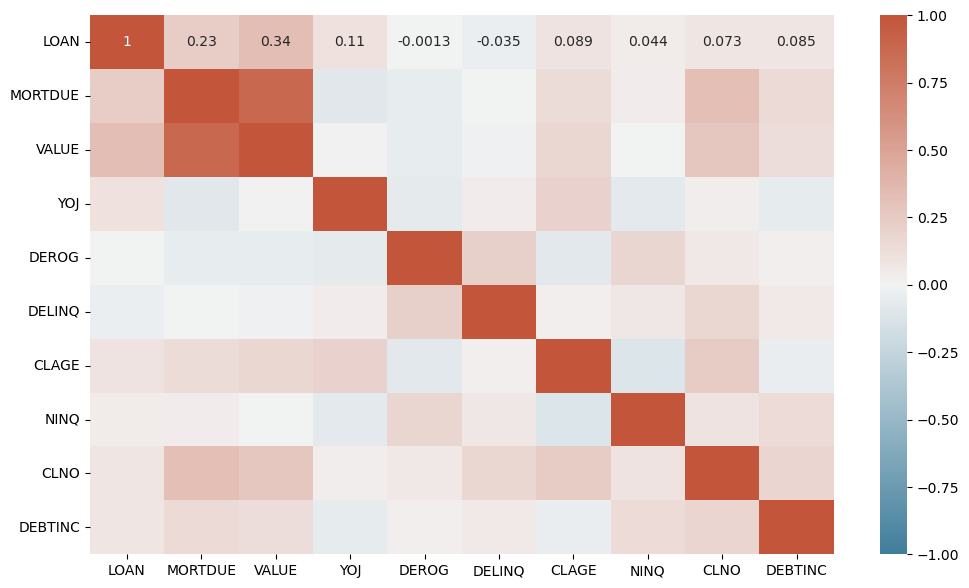

In [45]:
# Set figure size.
plt.figure(figsize=(12, 7))
# Set color map.
cmap = sns.diverging_palette(230, 20, as_cmap = True)
# Draw a heatmap of the columns correlation to each other.
sns.heatmap(data.drop(['BAD'],axis = 1).corr(numeric_only = True), annot = True, vmin = -1, vmax = 1, cmap = cmap)
# Display the plots.
plt.show()

🔬 **Correlation Matrix Observations**

- **Strong Correlations**  
   - `MORTDUE` and `VALUE` have a **very strong positive correlation** (**0.88**).  
     👉 Mortgage due is usually proportional to property value.  
   - `CLNO` (number of credit lines) shows **moderate correlation** with `MORTDUE` (**0.32**) and `VALUE` (**0.27**).  
     👉 People with more credit lines tend to have higher mortgages and property values.  

- **Moderate Correlations**  
   - `LOAN` correlates with `VALUE` (**0.34**) and `MORTDUE` (**0.23**).  
     👉 Larger loans are associated with higher property values and mortgages.  
   - `CLAGE` (age of credit line) has positive correlation with `YOJ` (**0.20**) and `CLNO` (**0.24**).  
     👉 Longer job experience often links to longer credit histories.  
   - `DEBTINC` shows weak-to-moderate correlation with `NINQ` (**0.14**) and `CLNO` (**0.19**).  
     👉 Debt-to-income ratio is influenced by inquiries and credit lines.  

- **Credit Risk Indicators**  
   - `DEROG` and `DELINQ` are **positively correlated** (**0.21**).  
     👉 More serious derogatory records often coincide with delinquencies.  
   - `DEROG` also correlates with `NINQ` (**0.17**).  
     👉 More credit inquiries may relate to higher derogatory marks.  

- **Weak or Negligible Correlations**  
   - `YOJ` (years on the job) has very weak relationships with most variables, except a slight positive with `CLAGE` (**0.20**).  
   - `DELINQ` shows very weak correlations with most variables.  
     👉 Delinquencies occur relatively independently from loan size, property value, or mortgage due.  

- **Potential Multicollinearity**  
   - The high correlation between `MORTDUE` and `VALUE` (**0.88**) is a **multicollinearity risk**.  
     👉 If used in regression, one may need to be dropped or transformed.  

---

⚠️ **Key Takeaways**

Most correlations are weak-to-moderate, with the exception of the very strong relationship between **`MORTDUE` and `VALUE`**. This suggests that most features contribute relatively independently, but caution is needed when including highly correlated mortgage/property variables in predictive models.

#### **2. Numerical Variable Distribution**

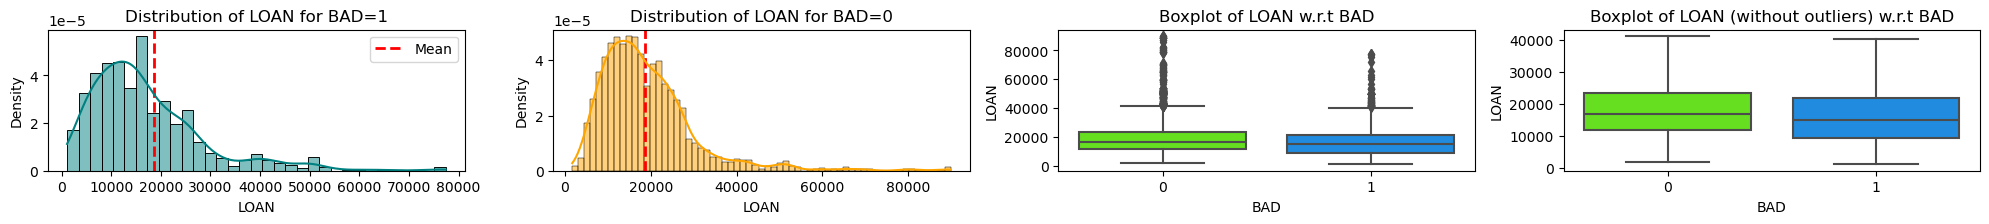

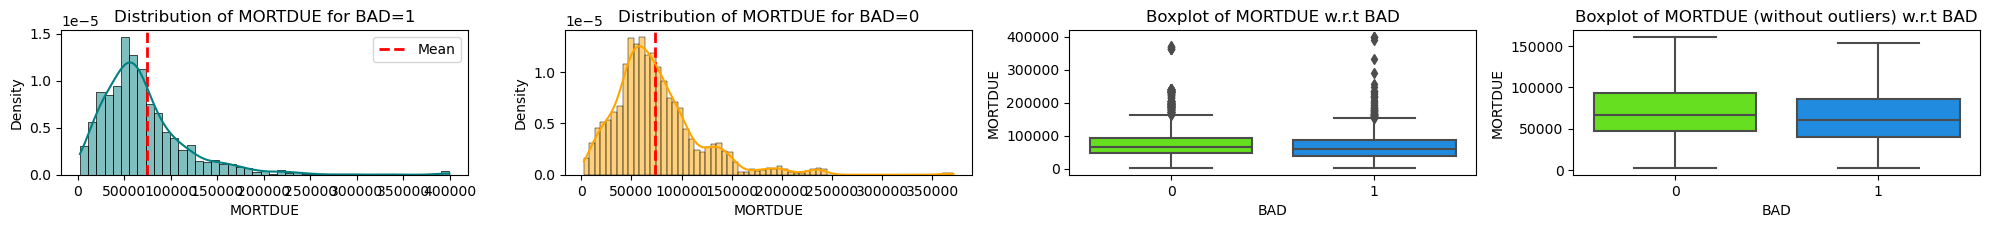

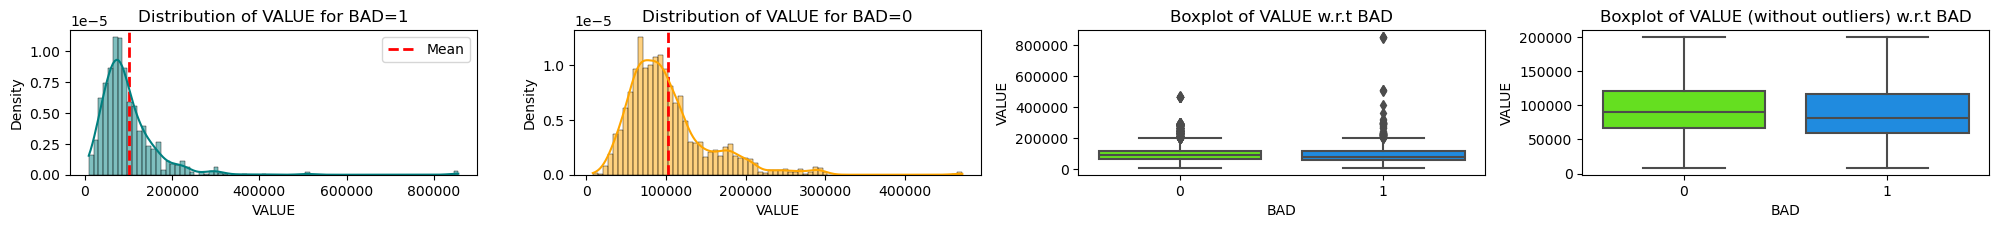

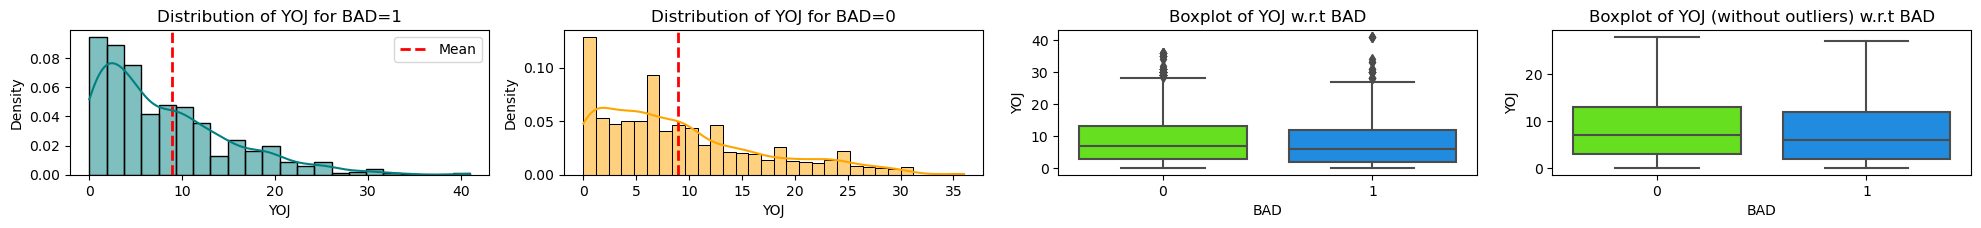

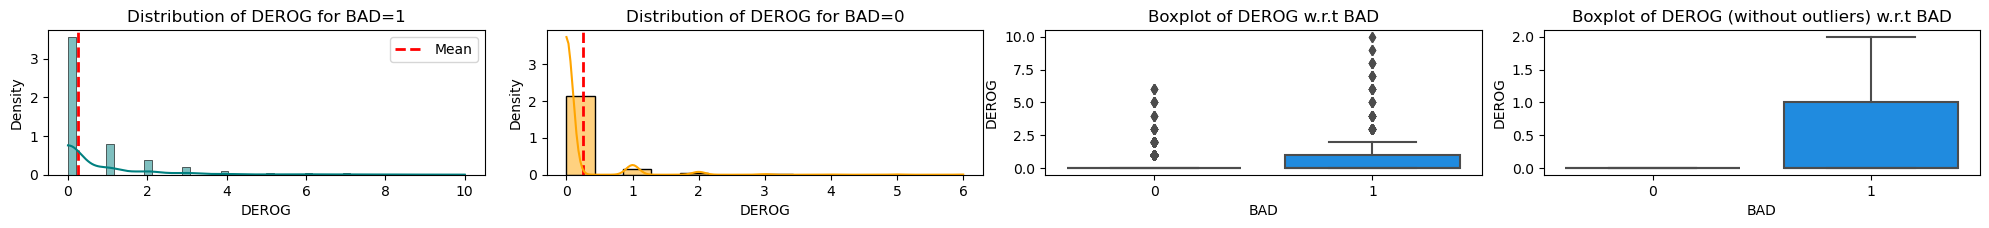

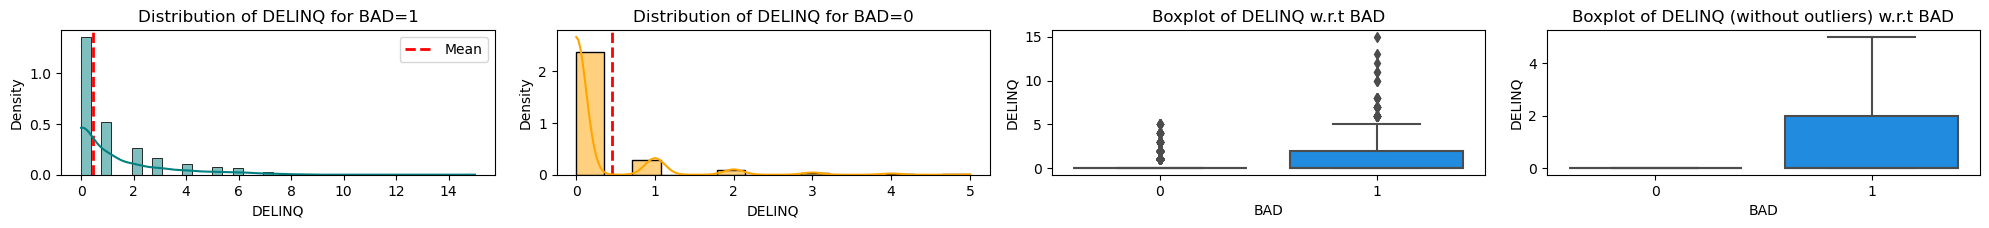

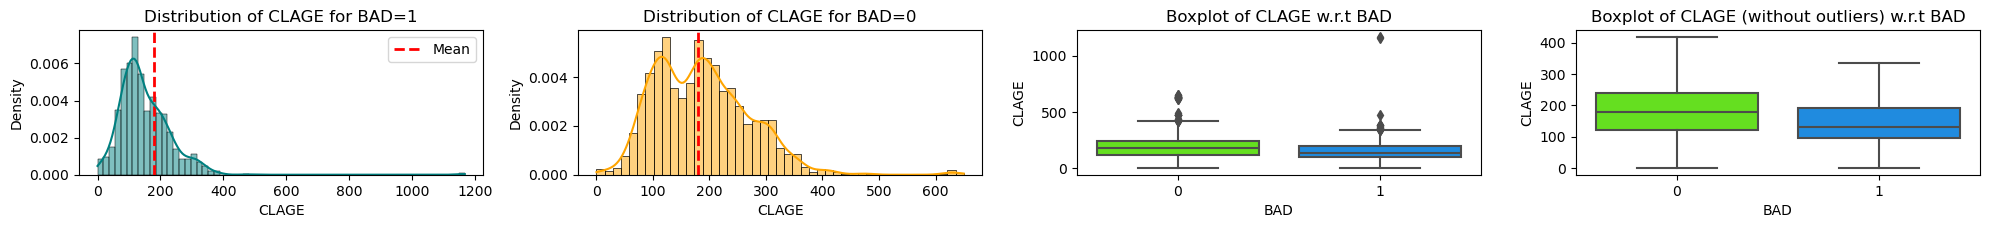

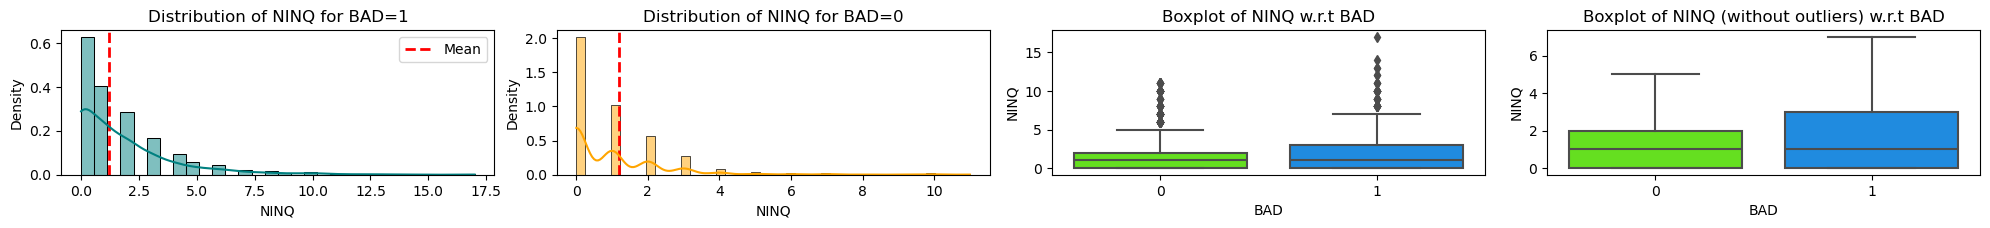

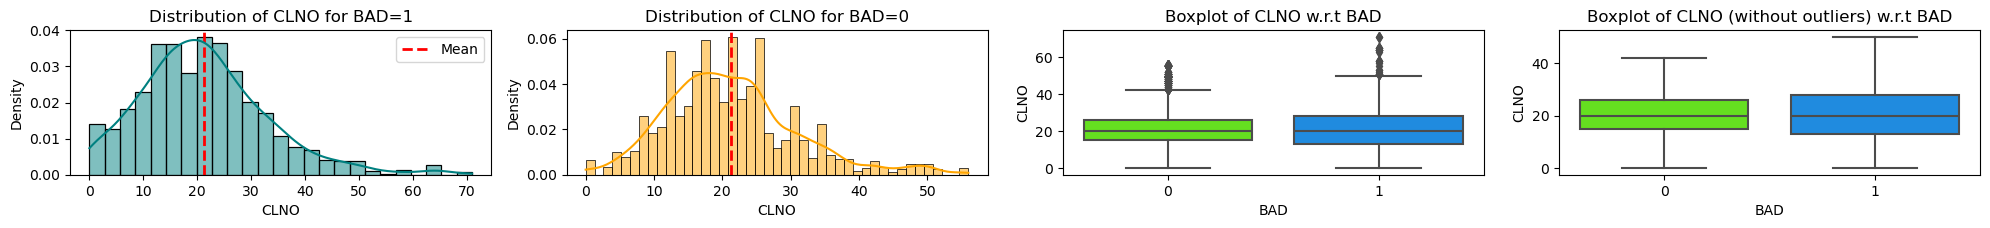

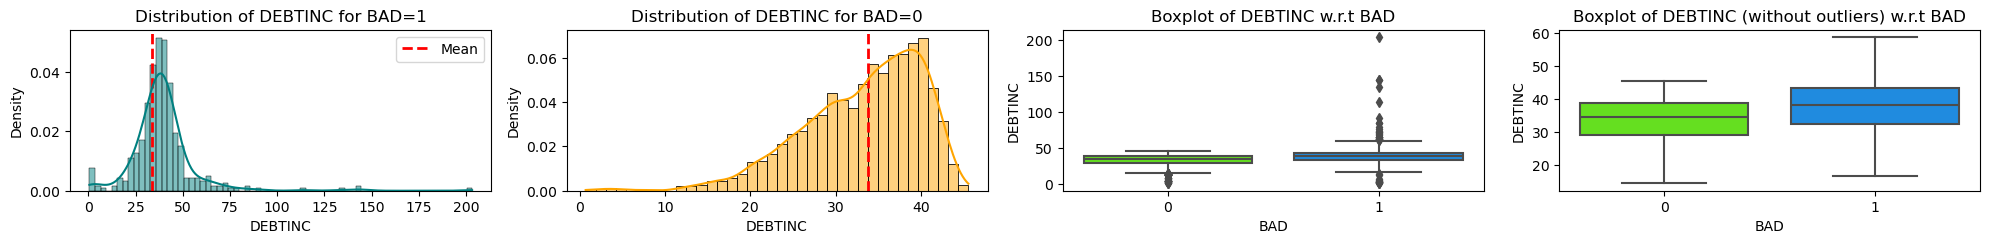

In [48]:
def plot_distribution_with_target(df, cols, target):
    """
    Plot numerical variable distributions with regard to each target variable value. Each variable gets four figures - 1) distribution of target variable value 1, 2) distribution of target variable value 2, 3) boxplot w.r.t target variable, 4) boxplot w.r.t target variable without outliers.
    
    Parameters
    ----------
    df : pandas.core.frame.DataFrame
        The original DataFrame.
    cols : pandas.core.indexes.base.Index
        A list of numerical variables (columns).
    target : str
        Target variable.

    Returns
    -------
    None.

    """

    # Get the number of rows. Each row displays four figures of a variable.
    num_rows = len(cols)
    
    # Iterate each column from the given dataset.
    for i, col in enumerate(cols, 1):
        
        # Set the figure size.
        plt.figure(figsize=(20, 20))
        
        # --------  Distribution for target variable value 1 --------
        # Set the first subplot position.
        plt.subplot(num_rows, 4, 4 * i - 3)
        # Extract unique values of the target variable.
        target_uniq = data[target].unique()
        # Draw a red dash line of the average value.
        plt.axvline(df[col].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
        # Set the title.
        plt.title(f"Distribution of {col} for {target}={str(target_uniq[0])}")
        # Draw the histogram.
        sns.histplot(data=df[df[target] == target_uniq[0]], x=col, kde=True, color="teal", stat="density")
        # Set the legend.
        plt.legend()
        
        # --------  Distribution for target variable value 2 --------
        # Set the second subplot position.
        plt.subplot(num_rows, 4, 4 * i - 2)
        # Draw a red dash line of the average value.
        plt.axvline(df[col].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
        # Set the title.
        plt.title(f"Distribution of {col} for {target}={str(target_uniq[1])}")
        # Plot histogram.
        sns.histplot(data=df[df[target] == target_uniq[1]], x=col, kde=True, color="orange", stat="density")
        
        # --------  Boxplot w.r.t target variable --------
        # Set the third subplot position.
        plt.subplot(num_rows, 4, 4 * i - 1)
        # Set the title.
        plt.title(f"Boxplot of {col} w.r.t {target}")
        # Draw boxplot to compare predictor values across target categories.
        sns.boxplot(data=df, x=target, y=col, palette="gist_rainbow")

        # --------  Boxplot w.r.t target variable without outliers--------
        # Set the forth subplot position.
        plt.subplot(num_rows, 4, 4 * i)
        # Set the title.
        plt.title(f"Boxplot of {col} (without outliers) w.r.t {target}")
        # Draw boxplot to compare predictor values across target categories.
        sns.boxplot(data=df, x=target, y=col, showfliers=False, palette="gist_rainbow")

        # Adjust spacing between subplots for readability.
        plt.tight_layout()
        # Show the plot.
        plt.show()

# Plot numerical variables.
plot_distribution_with_target(data, num_cols, 'BAD')

🔬 **Observations on Numerical Variables by Loan Default Status (BAD)**

- Loan Amount (LOAN)
    - **Defaults (`BAD=1`)**: Lower average loan amount (~16.9k) compared to non-defaults (~19.0k).  
    - Median loan amount is also smaller for defaulters (14.9k vs. 16.9k).  
    👉 Borrowers with **smaller loans are slightly more likely to default**.  
 
- Mortgage Due (MORTDUE)
    - **Defaults (`BAD=1`)**: Lower average mortgage balance (~69k) than non-defaults (~74.8k).  
    - Median also shows lower values (60k vs. 66k).  
    👉 Indicates **lower outstanding mortgage balance among defaulters**.  

- Property Value (VALUE)
    - **Defaults (`BAD=1`)**: Lower average property value (~98k) compared to non-defaults (~102.6k).  
    - Median property values are lower as well (82k vs. 90.6k).  
    👉 Borrowers with **less valuable properties are more likely to default**.  

- Years on Job (YOJ)
    - **Defaults (`BAD=1`)**: Average tenure is shorter (~8 years) than non-defaults (~9.1 years).  
    - Median tenure: 6 years for defaulters vs. 7 years for non-defaulters.  
    👉 **Less stable job history is associated with higher default risk**.  

- Number of Derogatory Reports (DEROG)
    - **Defaults (`BAD=1`)**: Average derogatory reports are significantly higher (0.71 vs. 0.13).  
    - A considerable number of defaulters have multiple derogatory marks (max=10).  
    👉 Strong evidence that **past credit issues correlate with default risk**.  

- Number of Delinquencies (DELINQ)
    - **Defaults (`BAD=1`)**: Higher delinquency frequency (mean=1.23 vs. 0.25).  
    - Defaulters have more severe outliers (max=15).  
    👉 **Delinquent payment history is a clear indicator of default risk**.  

- Credit Age (CLAGE)
    - **Defaults (`BAD=1`)**: Shorter average credit age (~150 months vs. 187 months).  
    - Median also shows a gap (133 months vs. 180 months).  
    👉 **Shorter credit history is linked to higher default rates**.  

- Number of Recent Credit Inquiries (NINQ)
    - **Defaults (`BAD=1`)**: Higher number of recent inquiries (mean=1.78 vs. 1.03).  
    - Defaulters reach extreme values (up to 17 inquiries vs. 11).  
    👉 **More frequent recent credit applications suggest financial stress and higher risk**.  

---

⚠️ Overall Insight
Borrowers with **smaller loans, lower property values, shorter job tenure, weaker credit history, more derogatory marks, higher delinquencies, and more recent inquiries** are more likely to default (`BAD=1`).  

#### **3. Categorical Variable Distribution**

------------------------------------------------------------------------------------------------------------------------
BAD         0     1   All
REASON                   
All      4567  1141  5708
DebtCon  3183   745  3928
HomeImp  1384   396  1780


<Figure size 8000x6000 with 0 Axes>

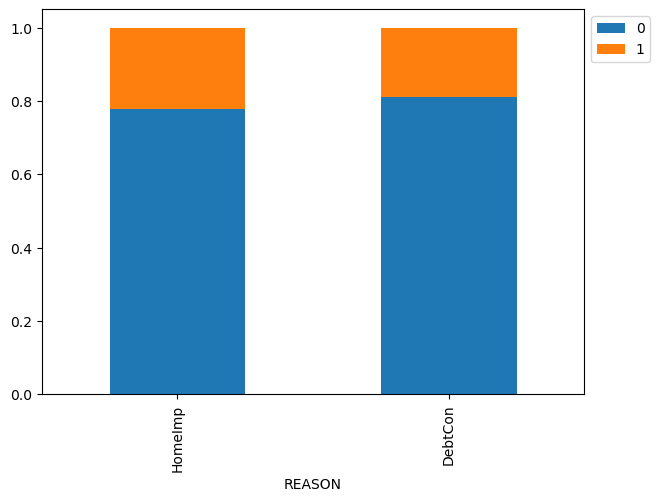

------------------------------------------------------------------------------------------------------------------------
BAD         0     1   All
JOB                      
All      4515  1166  5681
Other    1834   554  2388
ProfExe  1064   212  1276
Mgr       588   179   767
Office    823   125   948
Self      135    58   193
Sales      71    38   109


<Figure size 8000x6000 with 0 Axes>

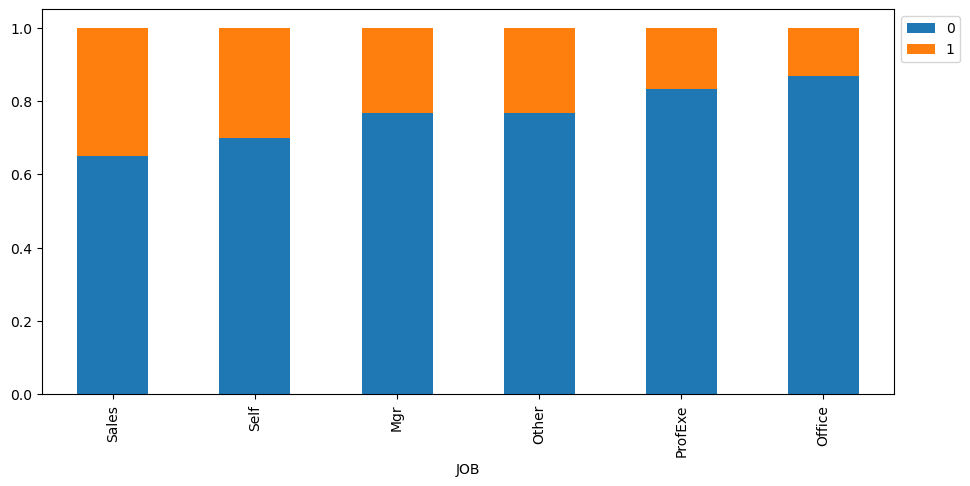

------------------------------------------------------------------------------------------------------------------------
BAD     0     1   All
BAD                  
1       0  1189  1189
All  4771  1189  5960
0    4771     0  4771


<Figure size 8000x6000 with 0 Axes>

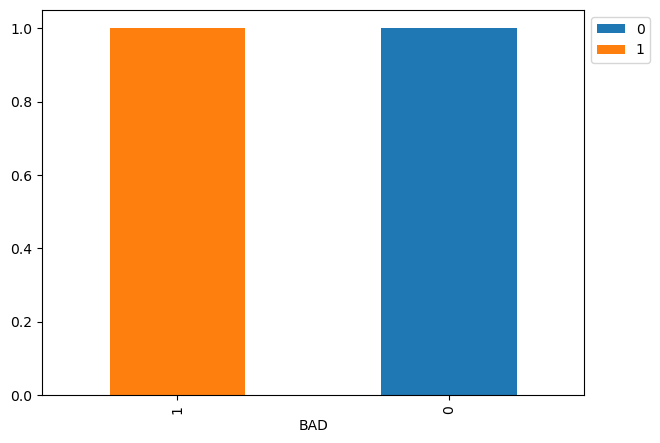

In [51]:
def draw_stacked_barplot(df, cols, target):
    """
    Plot stacked plots for each categorial variable's conversion with regard to each target variable value.

    Parameters
    ----------
    df : pandas.core.frame.DataFrame
        The original DataFrame.
    cols : pandas.core.indexes.base.Index
        A list of numerical variables (columns).
    target : str
        Target variable.

    Returns
    -------
    None.

    """
    # Get the number of rows. Each row represents a variable.
    num_rows = len(cols)
    # Iterate each column from the given dataset.
    for i, col in enumerate(cols, 1):
        # Set the figure size.
        plt.figure(figsize=(80, 60))
        # Count unique values under this column.
        count = df[col].nunique()
        # Print divider line.
        print("-" * 120)
        # Get the last unique value as the sorter value.
        sorter = df[target].value_counts().index[-1]
        # Create a cross table of each value's count of the given variable.
        table = pd.crosstab(df[col], df[target], margins=True).sort_values(by=sorter, ascending=False)
        # Print the cross table.
        print(table)
        # Create a normalized cross table using the same data for plotting.
        norm_table = pd.crosstab(df[col], df[target], normalize="index").sort_values(by=sorter, ascending=False)
        # Plot the stacked bar plot of the normalized cross table.
        norm_table.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
        # Set the legend.
        plt.legend(loc="lower left", frameon=False)
        # Set the legend.
        plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
        # Show the plot.
        plt.show()

# Plot numerical variables.
draw_stacked_barplot(data, cat_cols, 'BAD')

🔬 **Observations on Categorical Variables**

- Target Variable: BAD
    - **Class distribution**:
      - **0 (Good loans / repaid)**: 4,771 (≈ 80.1%)
      - **1 (Bad loans / defaulted)**: 1,189 (≈ 19.9%)
    - Dataset is **imbalanced**, with significantly more good loans than bad loans.  
    - Imbalance handling (e.g., SMOTE, class weights, or balanced sampling) may be needed.

- REASON vs. BAD
    - Total observations: **5,708** (252 missing).
    - Categories:
      - **DebtCon (Debt Consolidation)**: 3,928 applicants → 745 bad (19.0% default rate).
      - **HomeImp (Home Improvement)**: 1,780 applicants → 396 bad (22.3% default rate).
    - **Insight**:
      - Home improvement loans have a **higher default rate** than debt consolidation loans.
      - Missing values in `REASON` (252) should be imputed or treated as a separate category.

- JOB vs. BAD
    - Total observations: **5,681** (279 missing).
    - Categories:
      - **Other**: 2,388 applicants → 554 bad (23.2% default rate).
      - **ProfExe (Professional/Executive)**: 1,276 applicants → 212 bad (16.6% default rate).
      - **Mgr (Managerial)**: 767 applicants → 179 bad (23.3% default rate).
      - **Office**: 948 applicants → 125 bad (13.2% default rate).
      - **Self-employed**: 193 applicants → 58 bad (30.1% default rate, **highest risk group**).
      - **Sales**: 109 applicants → 38 bad (34.9% default rate, **highest risk group** but small sample).
    - **Insight**:
      - Self-employed and sales applicants have the **highest probability of default**.
      - Office workers and professionals have the **lowest risk**.
      - Missing values (279) should be handled carefully—may hide important group info.

---

⚠️ **Key Takeaways**
- **BAD (target)**: Skewed toward good loans (80:20).
- **REASON**: Home improvement loans are riskier than debt consolidation.
- **JOB**: Default risk is **job-dependent**, with sales and self-employed being riskiest.


### **iii. Data Treatment**

#### **1. Outlier Treatment**

In [55]:
def treat_outliers(df,col):
    """
    Treat the outliers by replacing them with the whisker boundaries.

    Parameters
    ----------
    df : pandas.core.frame.DataFrame
        The origin dataset.
    col : str
        The name of the column that needs to be treated.

    Returns
    -------
    df : pandas.core.frame.DataFrame
        The modified dataset with treated outliers in the selected column.

    """
    
    # Find the first quartile.
    q1 = df[col].quantile(q=0.25)
    # Find the third quartile.
    q3 = df[col].quantile(q=0.75)
    # Find the Inter Quartile Range.
    iqr = q3 - q1
    # Calculate the Lower Whisker.
    lower_whisker = max(df[col].min(), q1 - 1.5 * iqr)
    # Calculate the Upper Whisker.
    upper_whisker = min(df[col].max(), q3 + 1.5 * iqr)
    # Replace extreme outlier values in column 'col' with the whisker boundaries.
    df[col] = np.clip(df[col], lower_whisker, upper_whisker)
    
    return df

In [56]:
# Create a copy of the raw data.
data_untreated = data.copy()
# Iterate each column.
for col in num_cols:
    # Treat this column's outlier.
    data = treat_outliers(data,col)

#### **2. Missing Value Treatment**

In [58]:
def flag_missing_values(df, col):
    """
    Flag missing values in the selected column with boolean variable, and store them in a new column.

    Parameters
    ----------
    df : pandas.core.frame.DataFrame
        The origin dataset.
    col : str
        The name of the selected column.

    Returns
    -------
    df : pandas.core.frame.DataFrame
        The modified dataset with treated outliers in the selected column.

    """
    
    # Convert the input column name to string.
    new_col = str(col)
    # Create a new column name to flag its missing value.
    new_col += '_missing_values_flag'
    # Flag missing value in this column with boolean.
    df[new_col] = df[col].isna()
    
    return df

In [59]:
# Get the list of columns with missing values.
missing_cols = [col for col in data.columns if data[col].isnull().any()]
# Iterate each column.
for col in missing_cols:
    # Flag the missing values in this column.
    flag_missing_values(data, col)

In [60]:
# Treat Missing values in numerical columns with median and mode in categorical variables

# Select numeric columns.
num_data = data[num_cols]

# Select categorical columns.
cat_data = data[cat_cols].columns.tolist()

# Fill numeric columns with median.
data[num_data.columns] = num_data.fillna(num_data.median())

# Fill categorical columns with mode.
for column in cat_data:
    mode = data[column].mode()[0]
    data[column] = data[column].fillna(mode)

### **iv. Final EDA**

#### **1. Summary statistics**

In [63]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
LOAN,5960.00000,18051.89597,9252.56529,1100.00000,11100.00000,16300.00000,23300.00000,41600.00000
MORTDUE,5960.00000,70997.06782,35597.71040,2063.00000,48139.00000,65019.00000,88200.25000,159306.00000
VALUE,5960.00000,98363.24447,44663.10577,8000.00000,66489.50000,89235.50000,119004.75000,200447.37500
YOJ,5960.00000,8.71130,7.12203,0.00000,3.00000,7.00000,12.00000,28.00000
DEROG,5960.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
DELINQ,5960.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
CLAGE,5960.00000,178.36868,78.39596,0.00000,117.37143,173.46667,227.14306,406.23064
NINQ,5960.00000,1.08540,1.31290,0.00000,0.00000,1.00000,2.00000,5.00000
CLNO,5960.00000,20.99438,9.24517,0.00000,15.00000,20.00000,26.00000,42.50000
DEBTINC,5960.00000,33.92353,6.34846,14.34537,30.76316,34.81826,37.94989,53.79780


🔬 **Observations**

- **LOAN**
    - Mean: **18,052**, Std: ~9,253  
    - Median: **16,300** (slightly below mean → mild right-skew)  
    - Max capped at **41,600**  

- **MORTDUE**
    - Mean: **~71,000**, Std: ~35,598  
    - Median: **65,019** (right-skewed)  
    - Max capped at **159,306**  

- **VALUE**
    - Mean: **98,363**, Std: ~44,663  
    - Median: **89,236** (slightly lower than mean → positive skew)  
    - Max capped at **200,447**  

- **YOJ (Years on Job)**
    - Mean: **8.7 years**, Median: **7 years**  
    - Max capped at **28 years**  

- **DEROG & DELINQ**
    - Both are **entirely 0** after treatment  
    - Indicates all missing/outlier values were replaced → may no longer provide predictive power  

- **CLAGE (Age of Credit Line)**
    - Mean: **178 months (~15 years)**, Median: **173 months**  
    - Max capped at **406 months (~34 years)**  

- **NINQ (Number of Inquiries)**
    - Mean: ~1.09, Median = 1  
    - Max capped at 5 → distribution reasonably controlled  

- **CLNO (Number of Credit Lines)**
    - Mean: ~21, Median = 20  
    - Max = 42.5  

- **DEBTINC (Debt-to-Income Ratio)**
    - Mean = **33.9%**, Median = **34.8%**  
    - Range: 14.3% – 53.8% → realistic financial spread  

---

⚠️ **Key Takeaways**

- No missing values remain in numerical features.  
- Outlier treatment effectively reduced extreme values, stabilizing distributions.  
- **DEROG & DELINQ losing variance** is a concern — may need special handling or binary transformation.  
- Dataset is now ready for **feature engineering and model training**.

#### **2. Distribution plots**

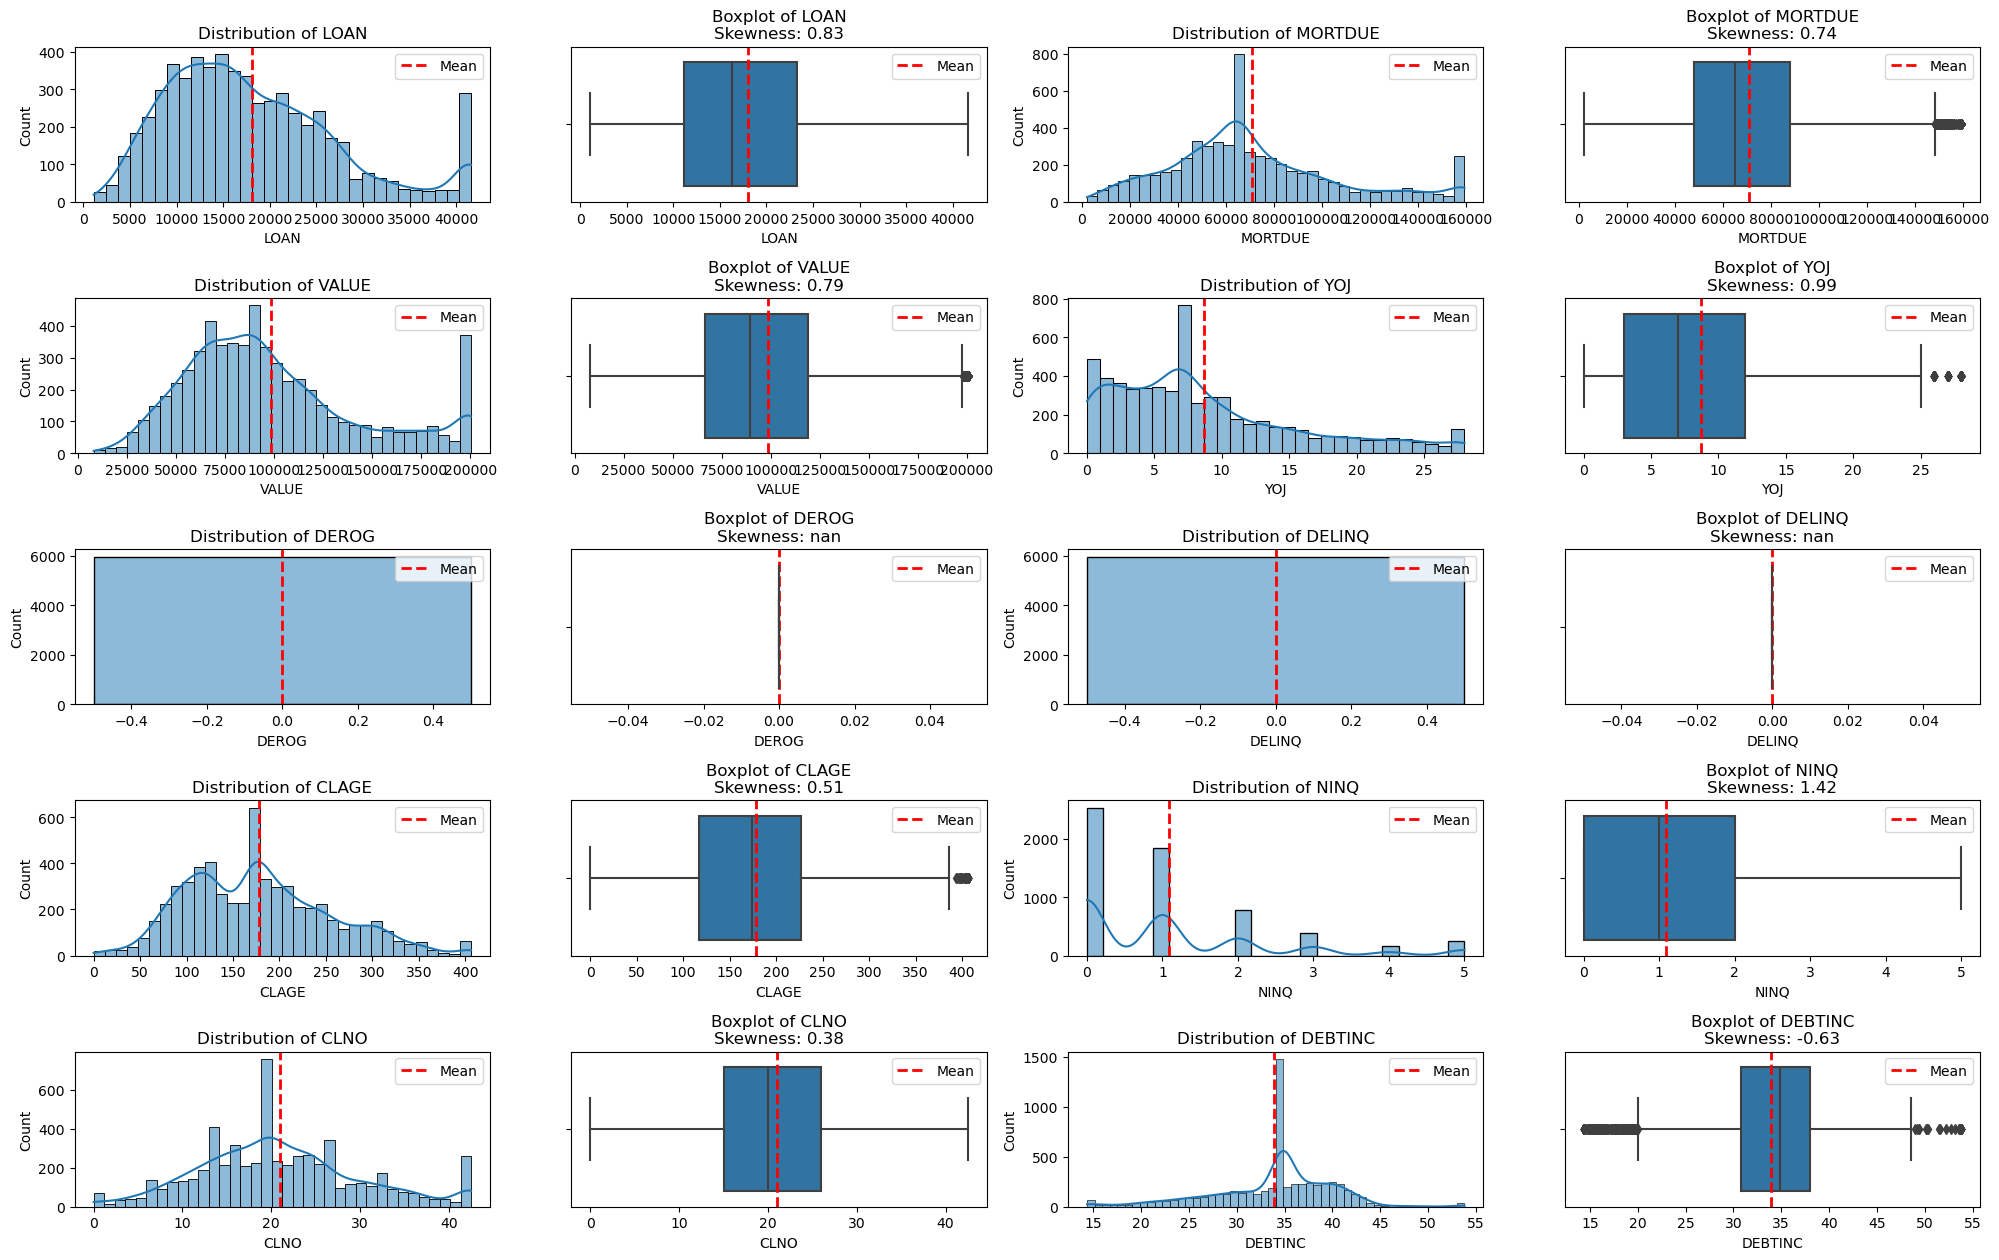

In [66]:
# Plot numerical variables.
plot_histogram_and_boxplot(data, num_cols)

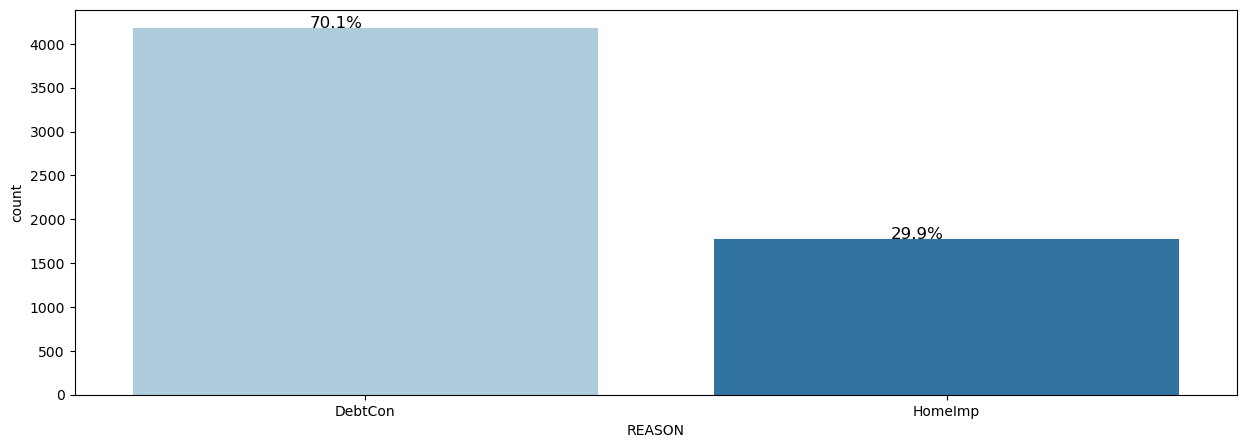

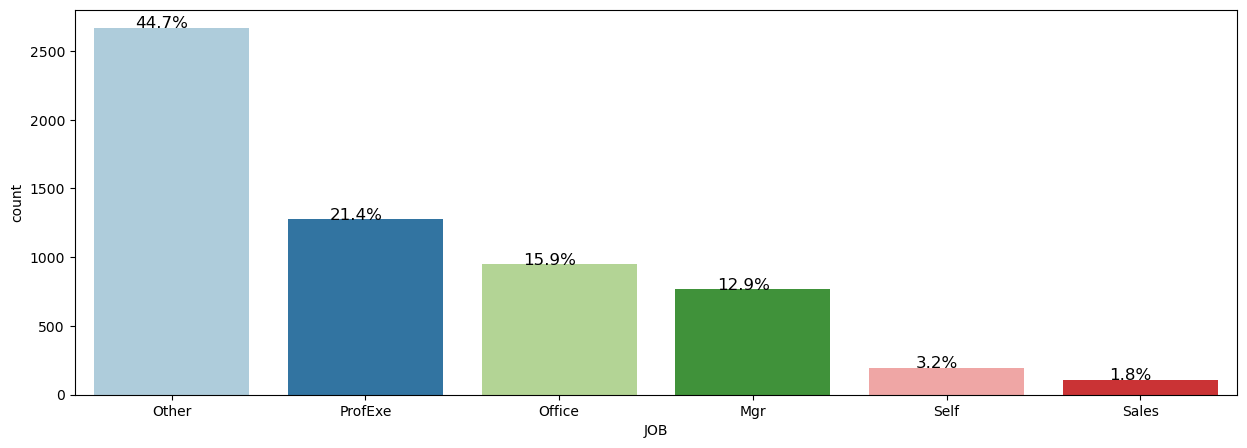

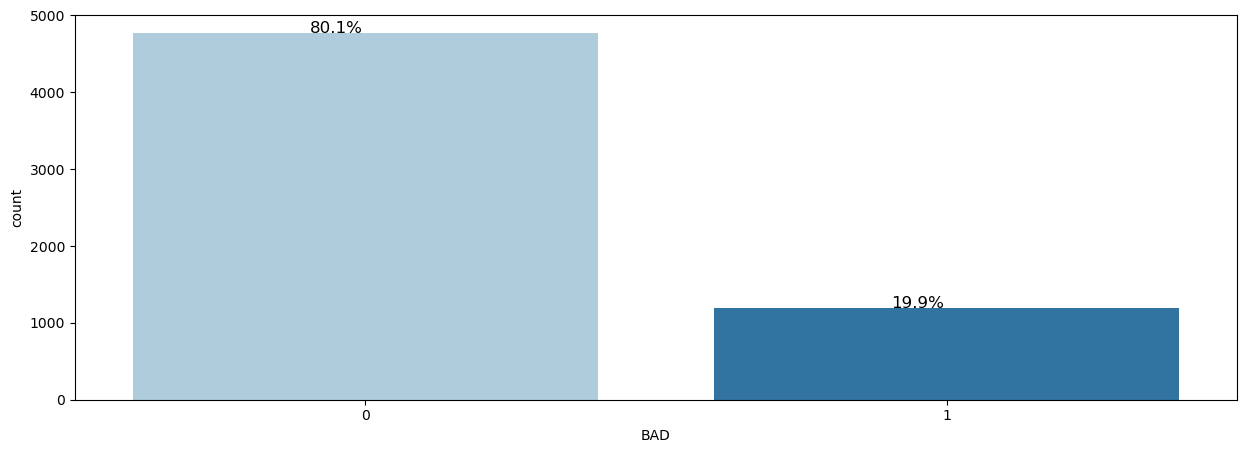

In [67]:
# Plot numerical variables.
plot_category_percentage(data, cat_cols)

🔬 **Observations on Numerical Features**

- **LOAN**
    - Count: 5960, Mean: 18,052, Std: 9,253
    - Min: 1,100, 25%: 11,100, Median: 16,300, 75%: 23,300, Max: 41,600
    - Missing values: 0
    - Observation: Loan amounts are right-skewed with a long tail towards higher values.

- **MORTDUE**
    - Count: 5960, Mean: 70,997, Std: 35,598
    - Min: 2,063, 25%: 48,139, Median: 65,019, 75%: 88,200, Max: 159,306
    - Missing values: 0
    - Observation: Mortgage dues are moderately spread; median is slightly below the mean, indicating slight right skew.

- **VALUE**
    - Count: 5960, Mean: 98,363, Std: 44,663
    - Min: 8,000, 25%: 66,490, Median: 89,236, 75%: 119,005, Max: 200,447
    - Missing values: 0
    - Observation: Property values show a wide range with higher-value outliers.

- **YOJ (Years on Job)**
    - Count: 5960, Mean: 8.71, Std: 7.12
    - Min: 0, 25%: 3, Median: 7, 75%: 12, Max: 28
    - Missing values: 0
    - Observation: Most applicants have under 12 years on the job; distribution is slightly right-skewed.

- **DEROG**
    - Count: 5960, Mean: 0, Std: 0
    - Observation: No derogatory reports after treatment; all values are 0.

- **DELINQ**
    - Count: 5960, Mean: 0, Std: 0
    - Observation: No delinquent reports; all values are 0.

- **CLAGE (Age of Credit)**
    - Count: 5960, Mean: 178.37, Std: 78.40
    - Min: 0, 25%: 117.37, Median: 173.47, 75%: 227.14, Max: 406.23
    - Missing values: 0
    - Observation: Credit history varies widely; some accounts are new (0) while others are very old.

- **NINQ (Number of Recent Inquiries)**
    - Count: 5960, Mean: 1.09, Std: 1.31
    - Min: 0, 25%: 0, Median: 1, 75%: 2, Max: 5
    - Missing values: 0
    - Observation: Most applicants have 0–2 recent inquiries.

- **CLNO (Number of Credit Lines)**
    - Count: 5960, Mean: 20.99, Std: 9.25
    - Min: 0, 25%: 15, Median: 20, 75%: 26, Max: 42.5
    - Missing values: 0
    - Observation: Majority have between 15 and 26 credit lines.

- **DEBTINC (Debt-to-Income Ratio)**
    - Count: 5960, Mean: 33.92, Std: 6.35
    - Min: 14.35, 25%: 30.76, Median: 34.82, 75%: 37.95, Max: 53.80
    - Missing values: 0
    - Observation: Debt-to-income ratios are moderately concentrated around the mean.

---

🔬 **Observations on Numerical Features**

- **REASON**
    - Counts: DebtCon: 4180, HomeImp: 1780
    - Percentages: DebtCon: 70.13%, HomeImp: 29.87%
    - Observation: Majority of applicants applied for debt consolidation.

- **JOB**
    - Counts: Other: 2667, ProfExe: 1276, Office: 948, Mgr: 767, Self: 193, Sales: 109
    - Percentages: Other: 44.75%, ProfExe: 21.41%, Office: 15.91%, Mgr: 12.87%, Self: 3.24%, Sales: 1.83%
    - Observation: Most applicants fall into the "Other" or "Professional/Executive" categories.

- **BAD (Target)**
    - Counts: 0: 4771, 1: 1189
    - Percentages: 0: 80.05%, 1: 19.95%
    - Observation: The dataset is imbalanced with ~20% bad loans.

#### **3. Correlation Heatmap**

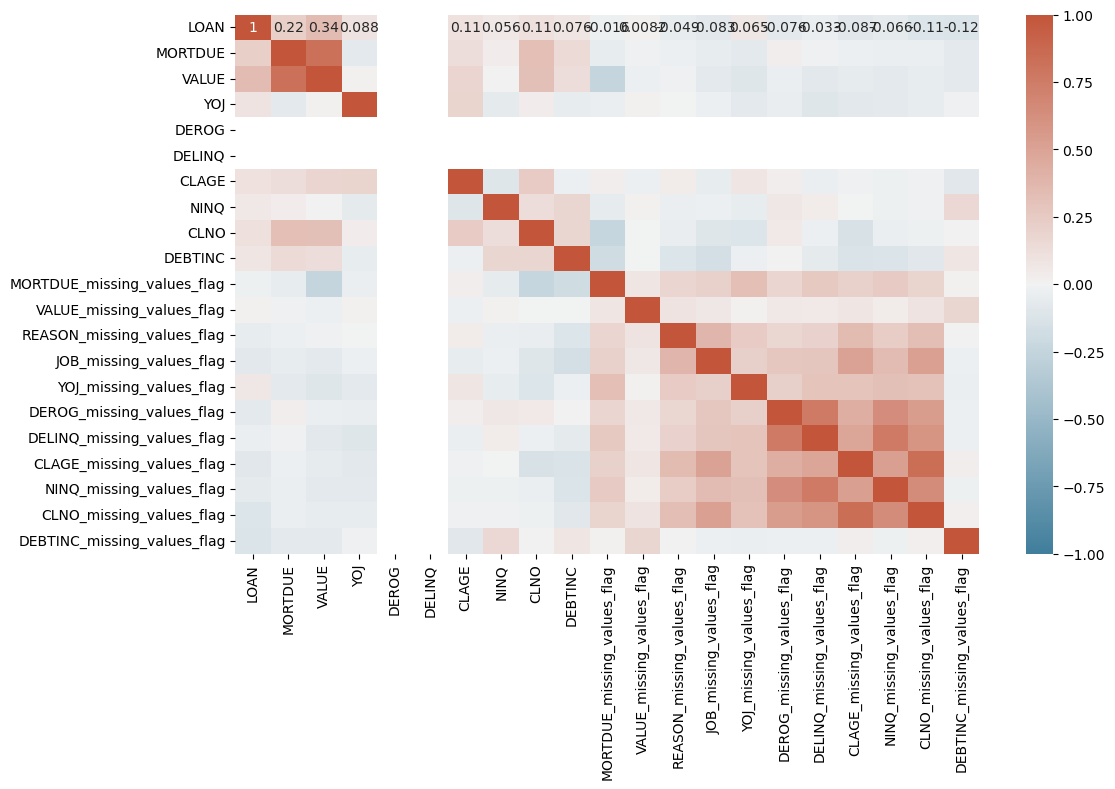

In [70]:
# Set figure size.
plt.figure(figsize=(12, 7))
# Set color map.
cmap = sns.diverging_palette(230, 20, as_cmap = True)
# Draw a heatmap of the columns correlation to each other.
sns.heatmap(data.drop(['BAD'],axis = 1).corr(numeric_only = True), annot = True, vmin = -1, vmax = 1, cmap = cmap)
# Display the plots.
plt.show()

🔬 **Observations**

- **LOAN**
  - Positively correlated with **VALUE (0.34)**, **MORTDUE (0.22)**, **CLAGE (0.11)**, and **CLNO (0.11)**
  - Weak correlations with DEBTINC (0.08) and NINQ (0.06)
  - Missing value flags show very low correlations with LOAN.

- **MORTDUE**
  - Strong positive correlation with **VALUE (0.83)** and moderate with **CLNO (0.33)**.
  - Weak correlations with LOAN (0.22) and DEBTINC (0.16)
  - Missing value flag correlations are negligible.

- **VALUE**
  - Strongly correlated with **MORTDUE (0.83)** and moderately with **LOAN (0.34)**, **CLNO (0.31)**, **CLAGE (0.18)**
  - Weak correlations with NINQ (0.001) and DEBTINC (0.13)

- **YOJ**
  - Slight positive correlations with **CLAGE (0.19)** and weak correlations with LOAN (0.09)
  - Weak negative correlation with NINQ (-0.07)
  
- **CLAGE**
  - Moderate positive correlations with **CLNO (0.24)**, **VALUE (0.18)**, **YOJ (0.19)**
  - Slight negative correlation with NINQ (-0.10)

- **CLNO**
  - Moderate positive correlations with **MORTDUE (0.33)**, **VALUE (0.31)**, **CLAGE (0.24)**, **DEBTINC (0.17)**

- **DEBTINC**
  - Moderate positive correlation with **CLNO (0.17)** and NINQ (0.17)
  - Weak positive correlations with LOAN (0.08), MORTDUE (0.16), VALUE (0.13)

- **NINQ**
  - Weak positive correlations with DEBTINC (0.17) and CLNO (0.13)
  - Slight negative correlation with CLAGE (-0.10)

- **Missing Value Flags**
  - All missing value flags have very weak correlations with the numerical features, suggesting missing data imputation has reduced their influence.

---

⚠️ **Key Takeaways**
- Strongest correlation is between **MORTDUE** and **VALUE (0.83)**.
- LOAN, VALUE, CLAGE, and CLNO show moderate inter-correlations.
- Other features (YOJ, NINQ, DEBTINC) show weak correlations.
- Missing value flags are mostly uncorrelated with other features.

#### **4. Target - Feature Comparison**

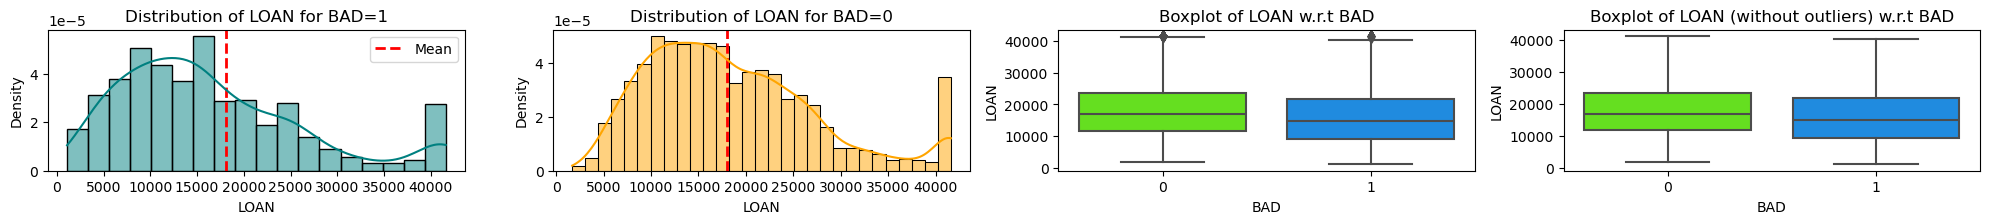

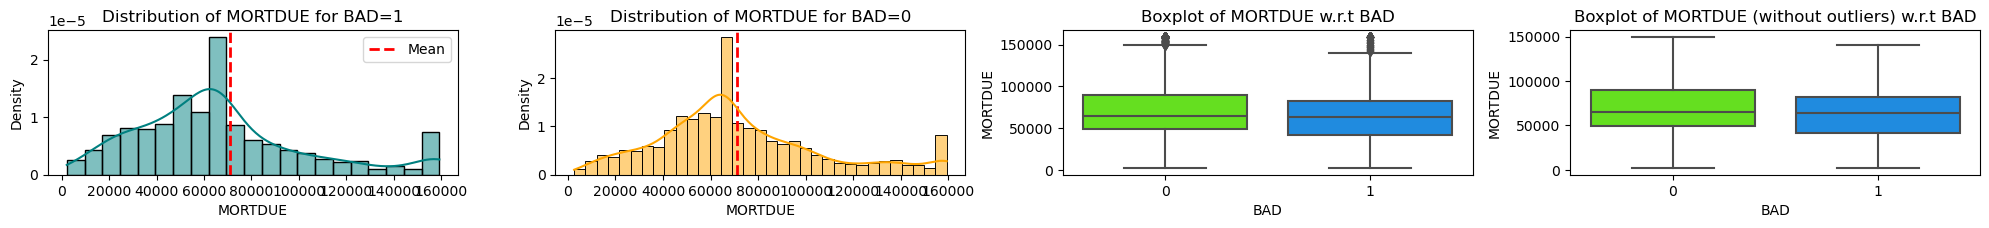

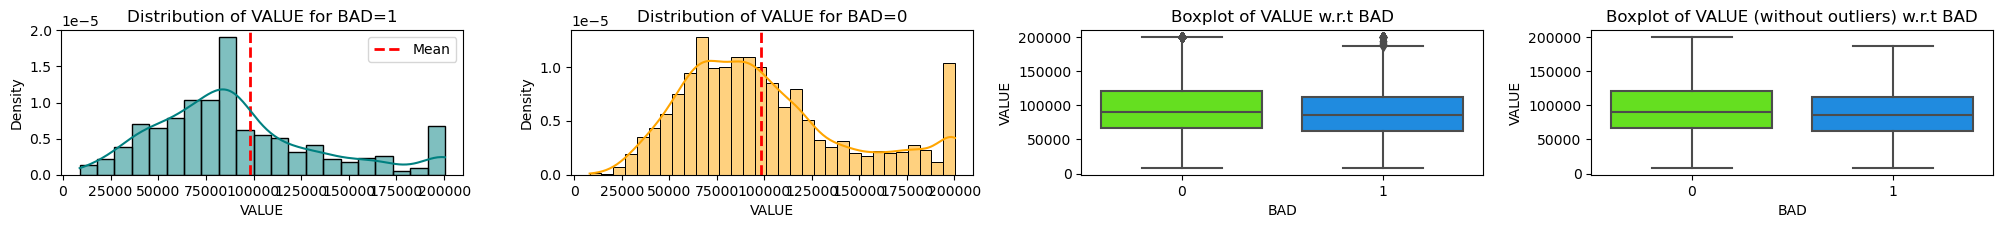

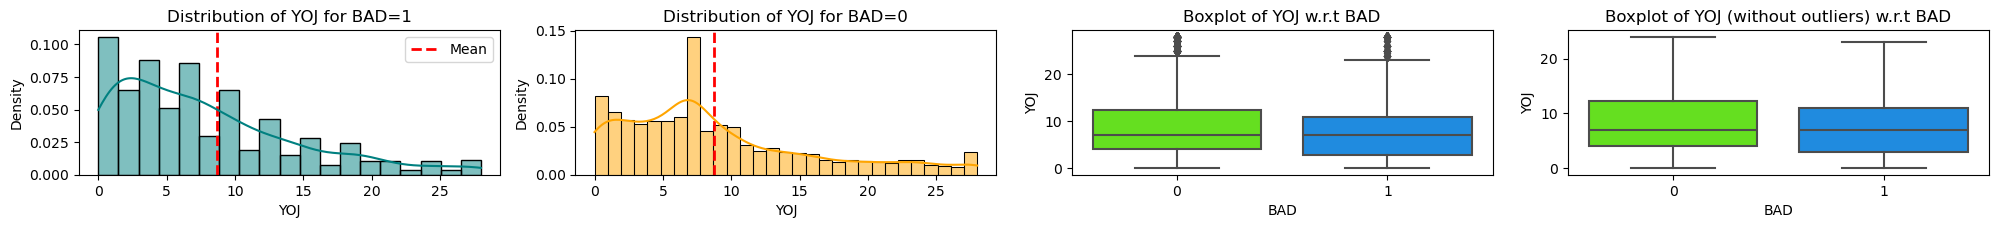

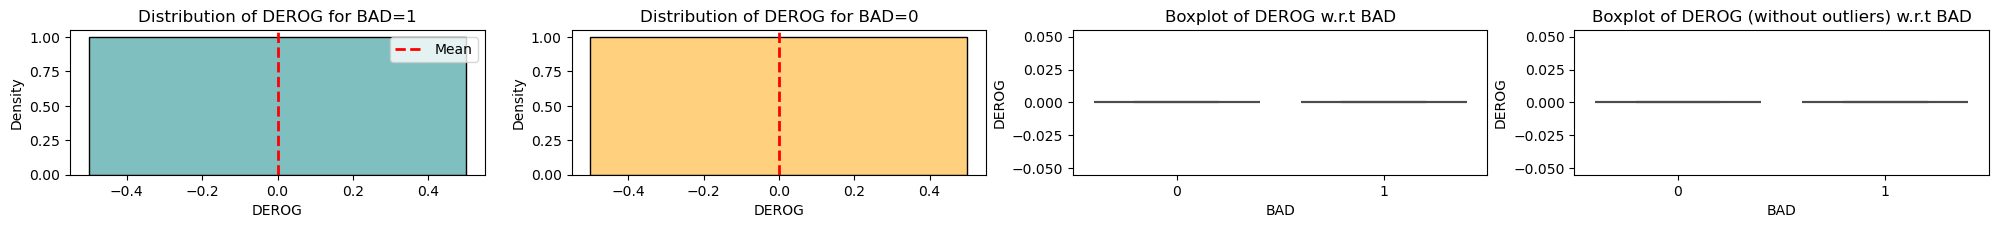

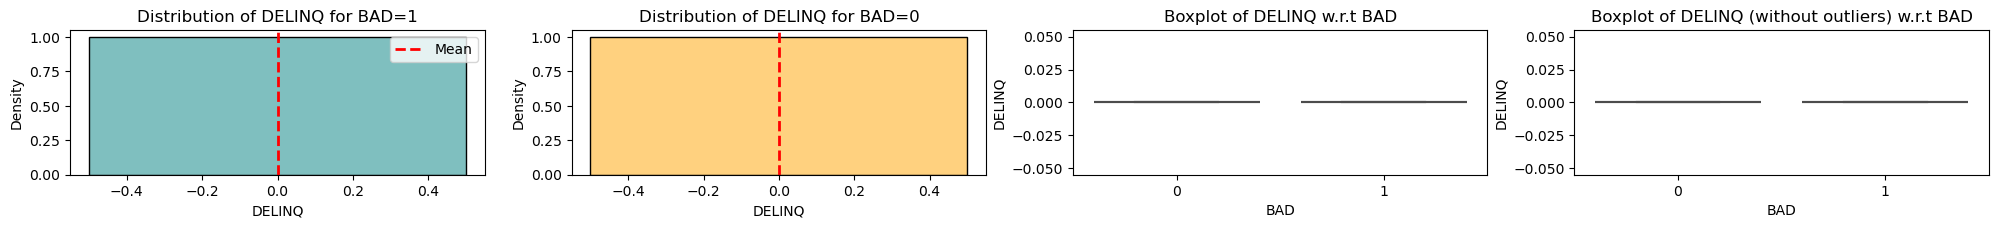

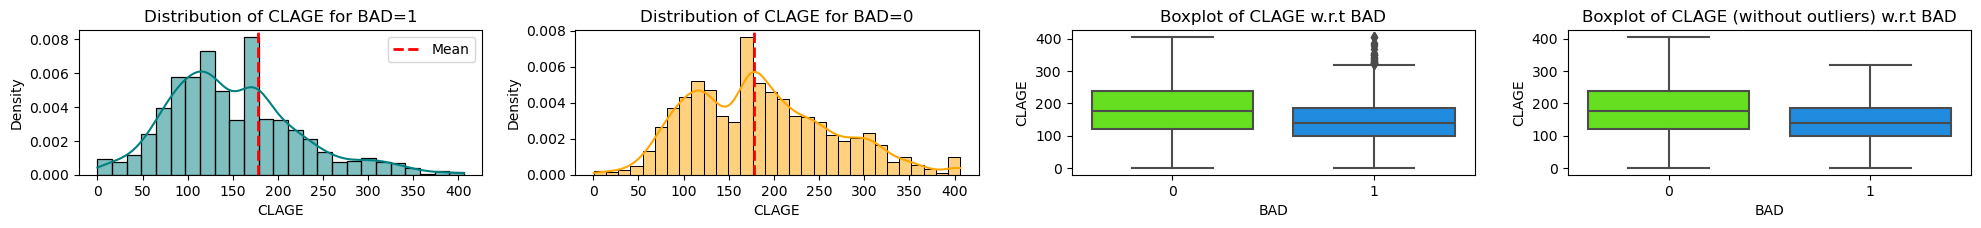

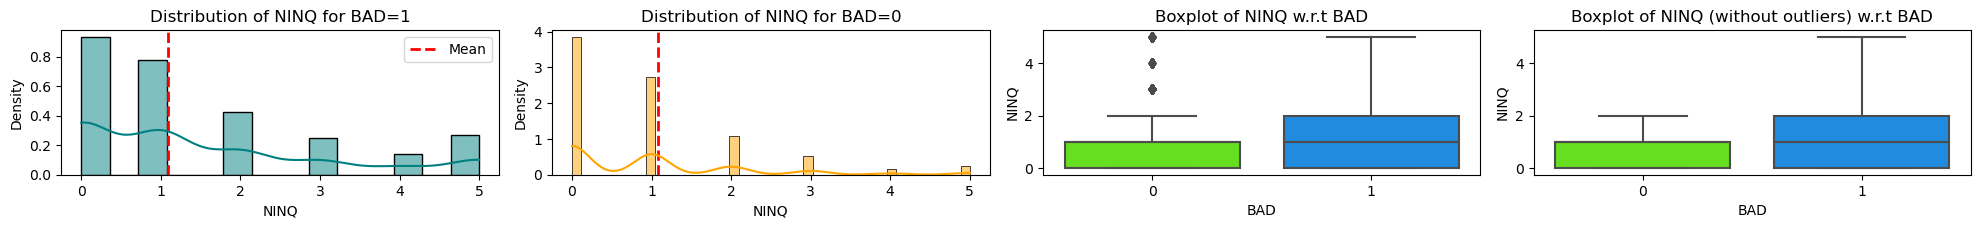

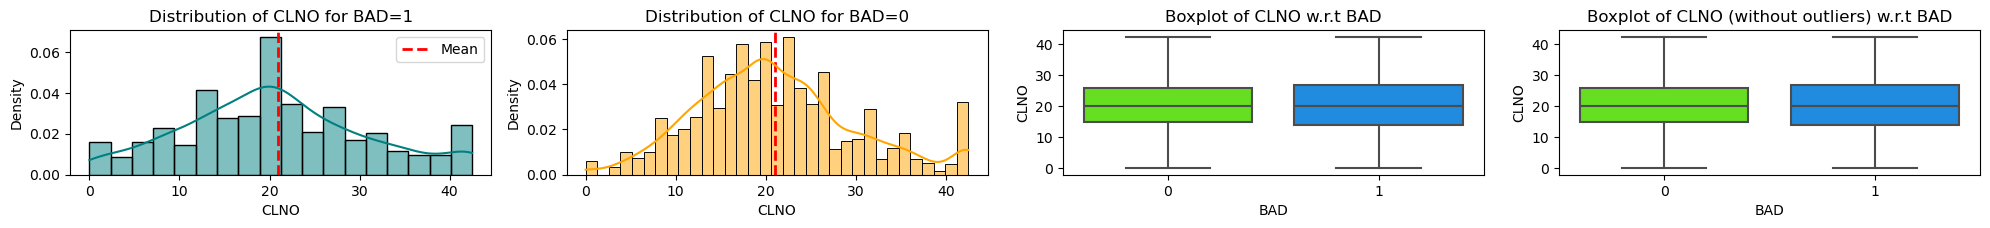

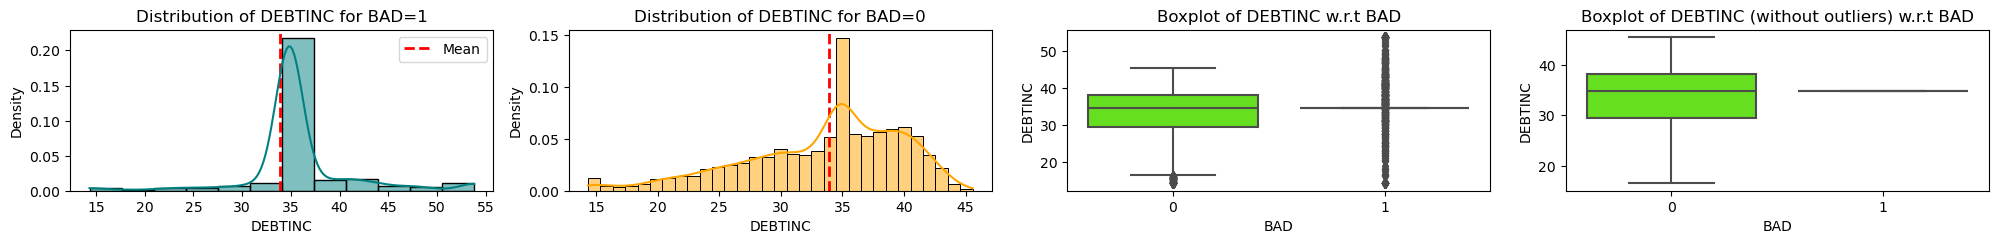

In [73]:
# Plot numerical variables.
plot_distribution_with_target(data, num_cols, 'BAD')

------------------------------------------------------------------------------------------------------------------------
BAD         0     1   All
REASON                   
All      4771  1189  5960
DebtCon  3387   793  4180
HomeImp  1384   396  1780


<Figure size 8000x6000 with 0 Axes>

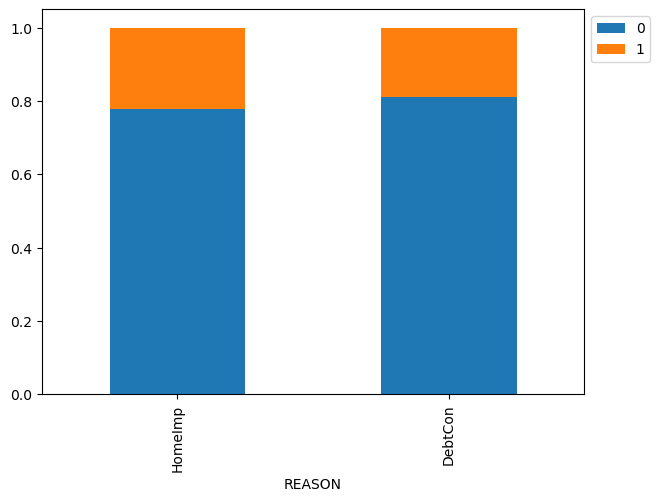

------------------------------------------------------------------------------------------------------------------------
BAD         0     1   All
JOB                      
All      4771  1189  5960
Other    2090   577  2667
ProfExe  1064   212  1276
Mgr       588   179   767
Office    823   125   948
Self      135    58   193
Sales      71    38   109


<Figure size 8000x6000 with 0 Axes>

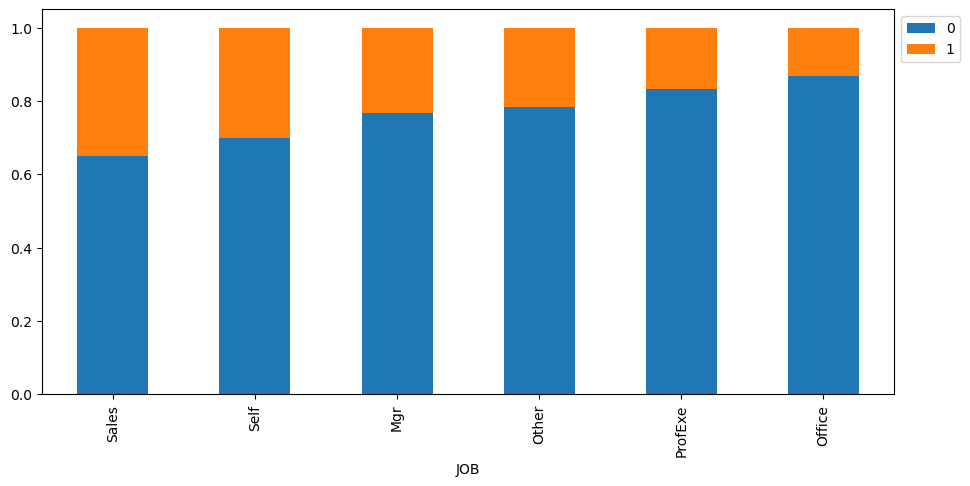

------------------------------------------------------------------------------------------------------------------------
BAD     0     1   All
BAD                  
1       0  1189  1189
All  4771  1189  5960
0    4771     0  4771


<Figure size 8000x6000 with 0 Axes>

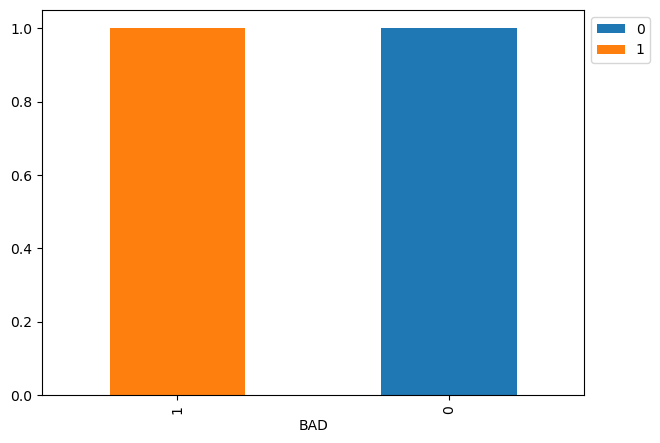

In [74]:
# Plot numerical variables.
draw_stacked_barplot(data, cat_cols, 'BAD')

🔬 **Observations**

- **LOAN**
    - **Count:** 5960, **Missing:** 0  
    - **Mean:** 18,052, **Median:** 16,300  
    - **Std:** 9,253  
    - **Range:** 1,100 – 41,600  
    - Observations: Most loans are concentrated around 16k–23k. No missing values after treatment.

- **MORTDUE**
    - **Count:** 5960, **Missing:** 0  
    - **Mean:** 70,997, **Median:** 65,019  
    - **Std:** 35,598  
    - **Range:** 2,063 – 159,306  
    - Observations: Mortgage amounts vary widely, some high-value outliers remain.

- **VALUE**
    - **Count:** 5960, **Missing:** 0  
    - **Mean:** 98,363, **Median:** 89,236  
    - **Std:** 44,663  
    - **Range:** 8,000 – 200,447  
    - Observations: Property values are right-skewed; median < mean.

- **YOJ (Years on Job)**
    - **Count:** 5960, **Missing:** 0  
    - **Mean:** 8.71, **Median:** 7  
    - **Std:** 7.12  
    - **Range:** 0 – 28  
    - Observations: Most borrowers have <10 years on the job; distribution slightly right-skewed.

- **DEROG & DELINQ**
    - **Count:** 5960, **Missing:** 0  
    - **Mean:** 0, **Median:** 0  
    - Observations: After treatment, all values are 0; no derogatory marks or delinquencies.

- **CLAGE (Age of Credit Line)**
    - **Count:** 5960, **Missing:** 0  
    - **Mean:** 178, **Median:** 173  
    - **Std:** 78  
    - **Range:** 0 – 406  
    - Observations: Majority of borrowers have credit lines >100 months; a few very low values.

- **NINQ (Number of Inquiries)**
    - **Count:** 5960, **Missing:** 0  
    - **Mean:** 1.08, **Median:** 1  
    - **Std:** 1.31  
    - **Range:** 0 – 5  
    - Observations: Most borrowers have ≤2 recent credit inquiries.

- **CLNO (Number of Credit Lines)**
    - **Count:** 5960, **Missing:** 0  
    - **Mean:** 20.99, **Median:** 20  
    - **Std:** 9.25  
    - **Range:** 0 – 42.5  
    - Observations: Credit lines distributed mostly between 15–26; some high-end outliers.

- **DEBTINC (Debt-to-Income Ratio)**
    - **Count:** 5960, **Missing:** 0  
    - **Mean:** 33.92, **Median:** 34.82  
    - **Std:** 6.35  
    - **Range:** 14.35 – 53.80  
    - Observations: Most borrowers have debt-to-income ratio between 30–38%.

---

**REASON**
| REASON  | BAD=0 | BAD=1 | Total |
|---------|-------|-------|-------|
| DebtCon | 3387  | 793   | 4180  |
| HomeImp | 1384  | 396   | 1780  |
| **Total** | 4771  | 1189  | 5960  |

**Observations**: ~70% of borrowers applied for debt consolidation. Default rate slightly higher in HomeImp group (396/1780 ≈ 22%) than DebtCon (793/4180 ≈ 19%).

**JOB**
| JOB     | BAD=0 | BAD=1 | Total |
|---------|-------|-------|-------|
| Mgr     | 588   | 179   | 767   |
| Office  | 823   | 125   | 948   |
| Other   | 2090  | 577   | 2667  |
| ProfExe | 1064  | 212   | 1276  |
| Sales   | 71    | 38    | 109   |
| Self    | 135   | 58    | 193   |
| **Total** | 4771  | 1189  | 5960  |

**Observations**: Default rates are higher among Self-employed (30%) and Sales (35%), lower among Mgr and Office roles.

**BAD**
| BAD | Count |
|-----|-------|
| 0   | 4771  |
| 1   | 1189  |
| **Total** | 5960 |

**Observations**: Dataset is imbalanced (~80% non-default, 20% default).

## **IV. Modelling**

### **i. Preparation**

#### **1. Data Preprocessing**

In [79]:
# Drop target variable.
X = data.drop(["BAD"], axis=1)
# Set target variable.
Y = data["BAD"]
# Encode the categorical variables.
X = pd.get_dummies(X, drop_first = True)
# Split the data in 70:30 ratio for train to test data.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

#### **2. Metrics Score Function Preparation**

In [81]:
def get_metrics_score(actual, predicted):
    """
    Evaluate the model performance by comparing confusion matrix of actual and predicted value.

    Parameters
    ----------
    actual : pandas.core.series.Series
        The actual data of target variable from the training set.
    predicted : numpy.ndarray
        The predicted data generated by the selected model using training data.

    Returns
    -------
    None.

    """

    # Print classification report for the datasets.
    print(classification_report(actual, predicted))
    # Build confusion matrix.
    cm = confusion_matrix(actual, predicted)
    # Set figure size.
    plt.figure(figsize = (8, 5))
    # Draw a heatmap of the  confusion matrix.
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Eligible', 'Eligible'], yticklabels = ['Not Eligible', 'Eligible'])
    # Set axis label.
    plt.ylabel('Actual')
    # Set axis label.
    plt.xlabel('Predicted')
    # Show the plot.
    plt.show()

### **ii. Logistic Regression**

In [83]:
# Create a Logistic Regression Classifier model.
log_reg = LogisticRegression(max_iter=1000, random_state=42)
# Fit the classifier on the training data.
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


              precision    recall  f1-score   support

           0       0.85      0.96      0.90      3355
           1       0.66      0.30      0.42       817

    accuracy                           0.83      4172
   macro avg       0.76      0.63      0.66      4172
weighted avg       0.81      0.83      0.81      4172



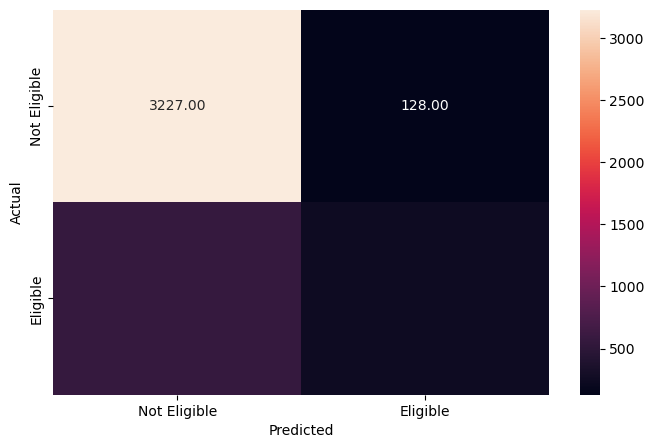

In [84]:
# Predict based on training data.
y_pred_train1 = log_reg.predict(X_train)
# Evaluate the model.
get_metrics_score(y_train, y_pred_train1)

              precision    recall  f1-score   support

           0       0.83      0.97      0.90      1416
           1       0.69      0.27      0.39       372

    accuracy                           0.82      1788
   macro avg       0.76      0.62      0.64      1788
weighted avg       0.80      0.82      0.79      1788



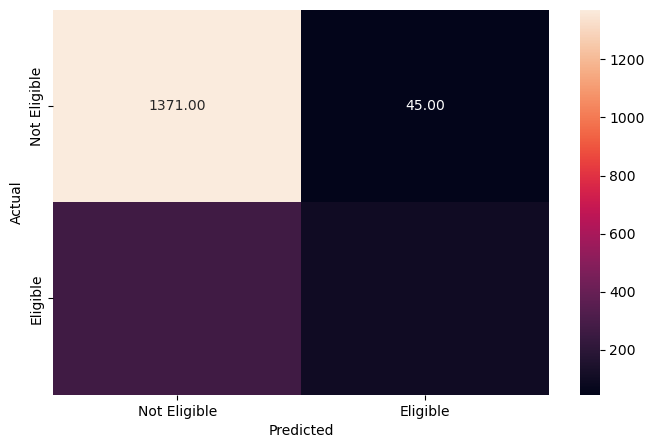

In [85]:
# Predict based on test data.
y_pred_test1 = log_reg.predict(X_test)
# Evaluate the model.
get_metrics_score(y_test, y_pred_test1)

In [86]:
# Get the coefficient of the model.
coefficients = pd.DataFrame({"Feature": X_train.columns, "Coefficient": log_reg.coef_[0]})
# Print the intercept.
print(f"The intercept of the logistic regression model is {log_reg.intercept_[0]}.")
print()
# Print the coefficient.
print("The coefficients of the logistic regression model are below.")
print(coefficients)

The intercept of the logistic regression model is -0.12818232984024308.

The coefficients of the logistic regression model are below.
                        Feature  Coefficient
0                          LOAN     -0.00002
1                       MORTDUE     -0.00000
2                         VALUE     -0.00000
3                           YOJ      0.01482
4                         DEROG      0.00000
5                        DELINQ      0.00000
6                         CLAGE     -0.01052
7                          NINQ      0.45767
8                          CLNO      0.01466
9                       DEBTINC      0.00063
10  MORTDUE_missing_values_flag     -0.02256
11    VALUE_missing_values_flag      0.19296
12   REASON_missing_values_flag      0.00743
13      JOB_missing_values_flag     -0.10074
14      YOJ_missing_values_flag     -0.08175
15    DEROG_missing_values_flag     -0.16606
16   DELINQ_missing_values_flag     -0.12511
17    CLAGE_missing_values_flag      0.03639
18     NINQ

🔬 **Observations**

- **Metrics score**
    - The model performs well in predicting **Class 0** but struggles with **Class 1** (low recall).  
    - This suggests that the model tends to classify many positive cases as negative (false negatives).  
    - Precision for Class `1` is relatively better (~0.69), meaning when the model predicts positive, it is correct most of the time.  
    - However, recall for Class `1` is very low (~0.27–0.30), showing the model misses a large portion of actual positive cases.  

- **Positive impact on predicting Class 1 (default = 1):**
    - `NINQ` (**0.4577**) → More recent credit inquiries increase the likelihood of default.
    - `DEBTINC_missing_values_flag` (**1.0961**) → Missing debt-to-income values strongly increase the likelihood of default.
    - `VALUE_missing_values_flag` (**0.1930**) → Missing property value data slightly increases the chance of default.
    - `JOB_Self` (**0.0550**) and `JOB_Sales` (**0.0366**) → These job categories slightly increase default risk.

- **Negative impact on predicting Class 1:**
    - `CLAGE` (**-0.0105**) → Longer credit history reduces default risk.
    - `JOB_Office` (**-0.1490**) and `JOB_Other` (**-0.0870**) → These job categories reduce the likelihood of default.
    - Several missing value flags (e.g., `DEROG`, `DELINQ`, `JOB_missing`) have negative coefficients, suggesting that when data is missing in these fields, the model tends to classify as non-default.

---

⚠️ **Key Takeaways**

- The model is **good at predicting non-defaults (Class 0)** but **poor at detecting defaults (Class 1)** due to low recall.  
- Certain features (e.g., **NINQ, DEBTINC_missing flag**) are strong indicators of default risk.  
- To improve recall for Class `1`, techniques like:
    - Adjusting the classification threshold,
    - Using resampling methods (SMOTE, oversampling minority class),
    - Trying more complex models (Random Forest, XGBoost) could be considered.

### **iii. Decision Tree**

#### **1. Modelling**

In [109]:
# Create a Decision Tree Classifier model.
d_tree =  DecisionTreeClassifier(random_state = 7)
# Fit the classifier on the training data.
d_tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,7
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



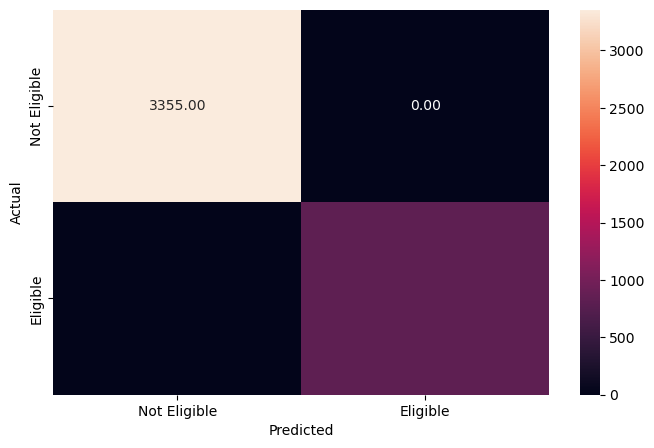

In [111]:
# Predict based on training data.
y_pred_train1 = d_tree.predict(X_train)
# Evaluate the model.
get_metrics_score(y_train, y_pred_train1)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1416
           1       0.66      0.59      0.63       372

    accuracy                           0.85      1788
   macro avg       0.78      0.76      0.77      1788
weighted avg       0.85      0.85      0.85      1788



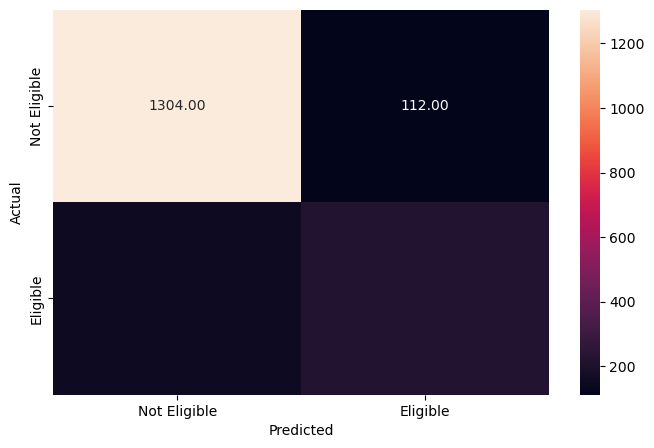

In [113]:
# Predict based on test data.
y_pred_test1 = d_tree.predict(X_test)
# Evaluate the model.
get_metrics_score(y_test, y_pred_test1)

🔬 **Observations**

- The model achieves **perfect performance (100%) on the training data**, which is a strong indication of **overfitting**.  
- On the **test set**, accuracy drops to **0.85**, showing that the model does not generalize as well to unseen data.  
- The model is better at predicting **Class 0** (non-defaults) with high precision and recall.  
- For **Class 1** (defaults), the model shows lower recall (**0.59**) and precision (**0.66**), meaning:
  - It **misses some true defaults** (false negatives).
  - When it predicts a default, it is correct about two-thirds of the time.  

---

⚠️ **Key Takeaways**

- The decision tree **fits the training data too closely** and does not generalize perfectly.  
- Compared to logistic regression:
  - The decision tree achieves higher recall for Class `1` (59% vs ~27–30%), making it **better at identifying defaults**.  
  - However, logistic regression provides a more stable and generalizable model.  
- To improve decision tree performance, consider:
  - **Pruning** the tree,
  - Setting **max_depth** or **min_samples_split**,
  - Or using an **ensemble method** (Random Forest, Gradient Boosting) for better generalization.

#### **2. Hyperparameter Tuning**

In [125]:
# Choose the type of classifier.
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})
# Set parameters.
parameters = {'max_depth': np.arange(2, 10), 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [5, 10, 20, 25]}
# Set the type of scoring to compare parameter combinations.
scorer = metrics.make_scorer(recall_score, pos_label = 1)
# Initialize GridSearchCV with the tuned decision tree.
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring=scorer, cv=5)
# Fit the grid search object on the training data to find the best hyperparameters.
grid_obj = grid_obj.fit(X_train, y_train)
# Set the classifier to the best combination of parameters.
d_tree_tuned = grid_obj.best_estimator_
# Fit the best algorithm to the data.
d_tree_tuned.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,7
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,"{0: 0.3, 1: 0.7}"


              precision    recall  f1-score   support

           0       0.94      0.90      0.92      3355
           1       0.65      0.76      0.70       817

    accuracy                           0.87      4172
   macro avg       0.79      0.83      0.81      4172
weighted avg       0.88      0.87      0.88      4172



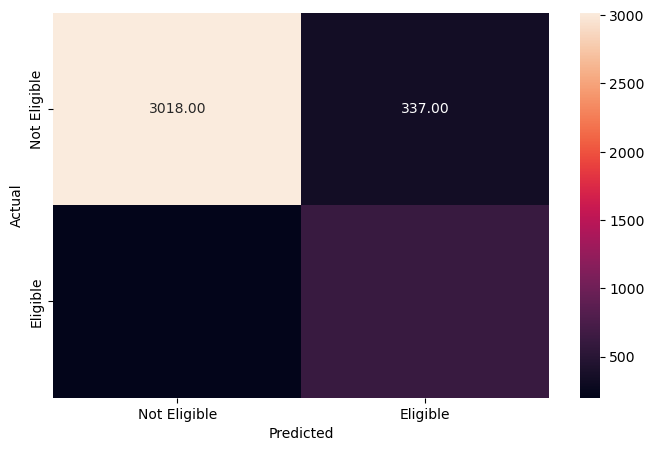

In [127]:
# Predict based on training data.
y_pred_train2 = d_tree_tuned.predict(X_train)
# Evaluate the model.
get_metrics_score(y_train, y_pred_train2)

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      1416
           1       0.66      0.73      0.69       372

    accuracy                           0.87      1788
   macro avg       0.80      0.82      0.80      1788
weighted avg       0.87      0.87      0.87      1788



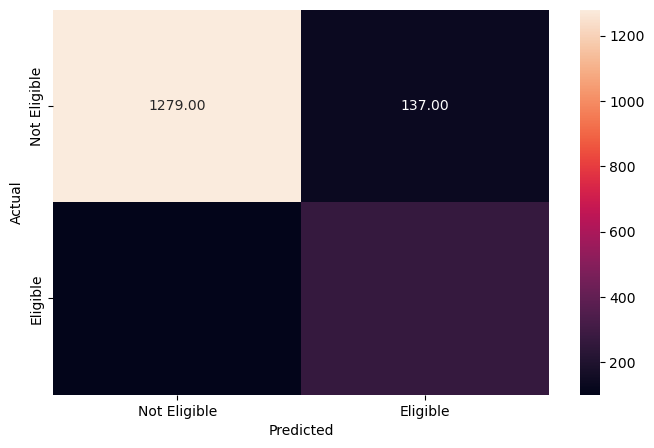

In [129]:
# Predict based on test data.
y_pred_test2 = d_tree_tuned.predict(X_test)
# Evaluate the model.
get_metrics_score(y_test, y_pred_test2)

🔬 **Observation**

- **Performance on Training Data:**
    - The model captures **76% of the actual defaults (recall)** while maintaining a decent precision.
    - Class 0 (non-default) is predicted with very high precision (**0.94**) and recall (**0.90**).  

- **Performance on Test Data:**
    - The model generalizes well, showing **balanced precision and recall for defaults**.
    - Importantly, the **recall for class 1 remains high (0.73)**, meaning the model is effective at identifying most defaulters.  

---

⚠️ **Key Takeaways**
- The tuned decision tree **outperforms Logistic Regression in recall for the minority class (defaults)**, which is critical in credit risk prediction.  
- The model does **not overfit** (training and test scores are similar).  
- Precision for class 1 is lower compared to class 0, but this is expected in imbalanced datasets.  
- Overall, the model achieves a strong balance between **accuracy (0.87)** and **recall for class 1 (0.73)**, making it suitable for risk-sensitive applications like loan default prediction.  

#### **3. Visualization**

##### **3.1. Tree**

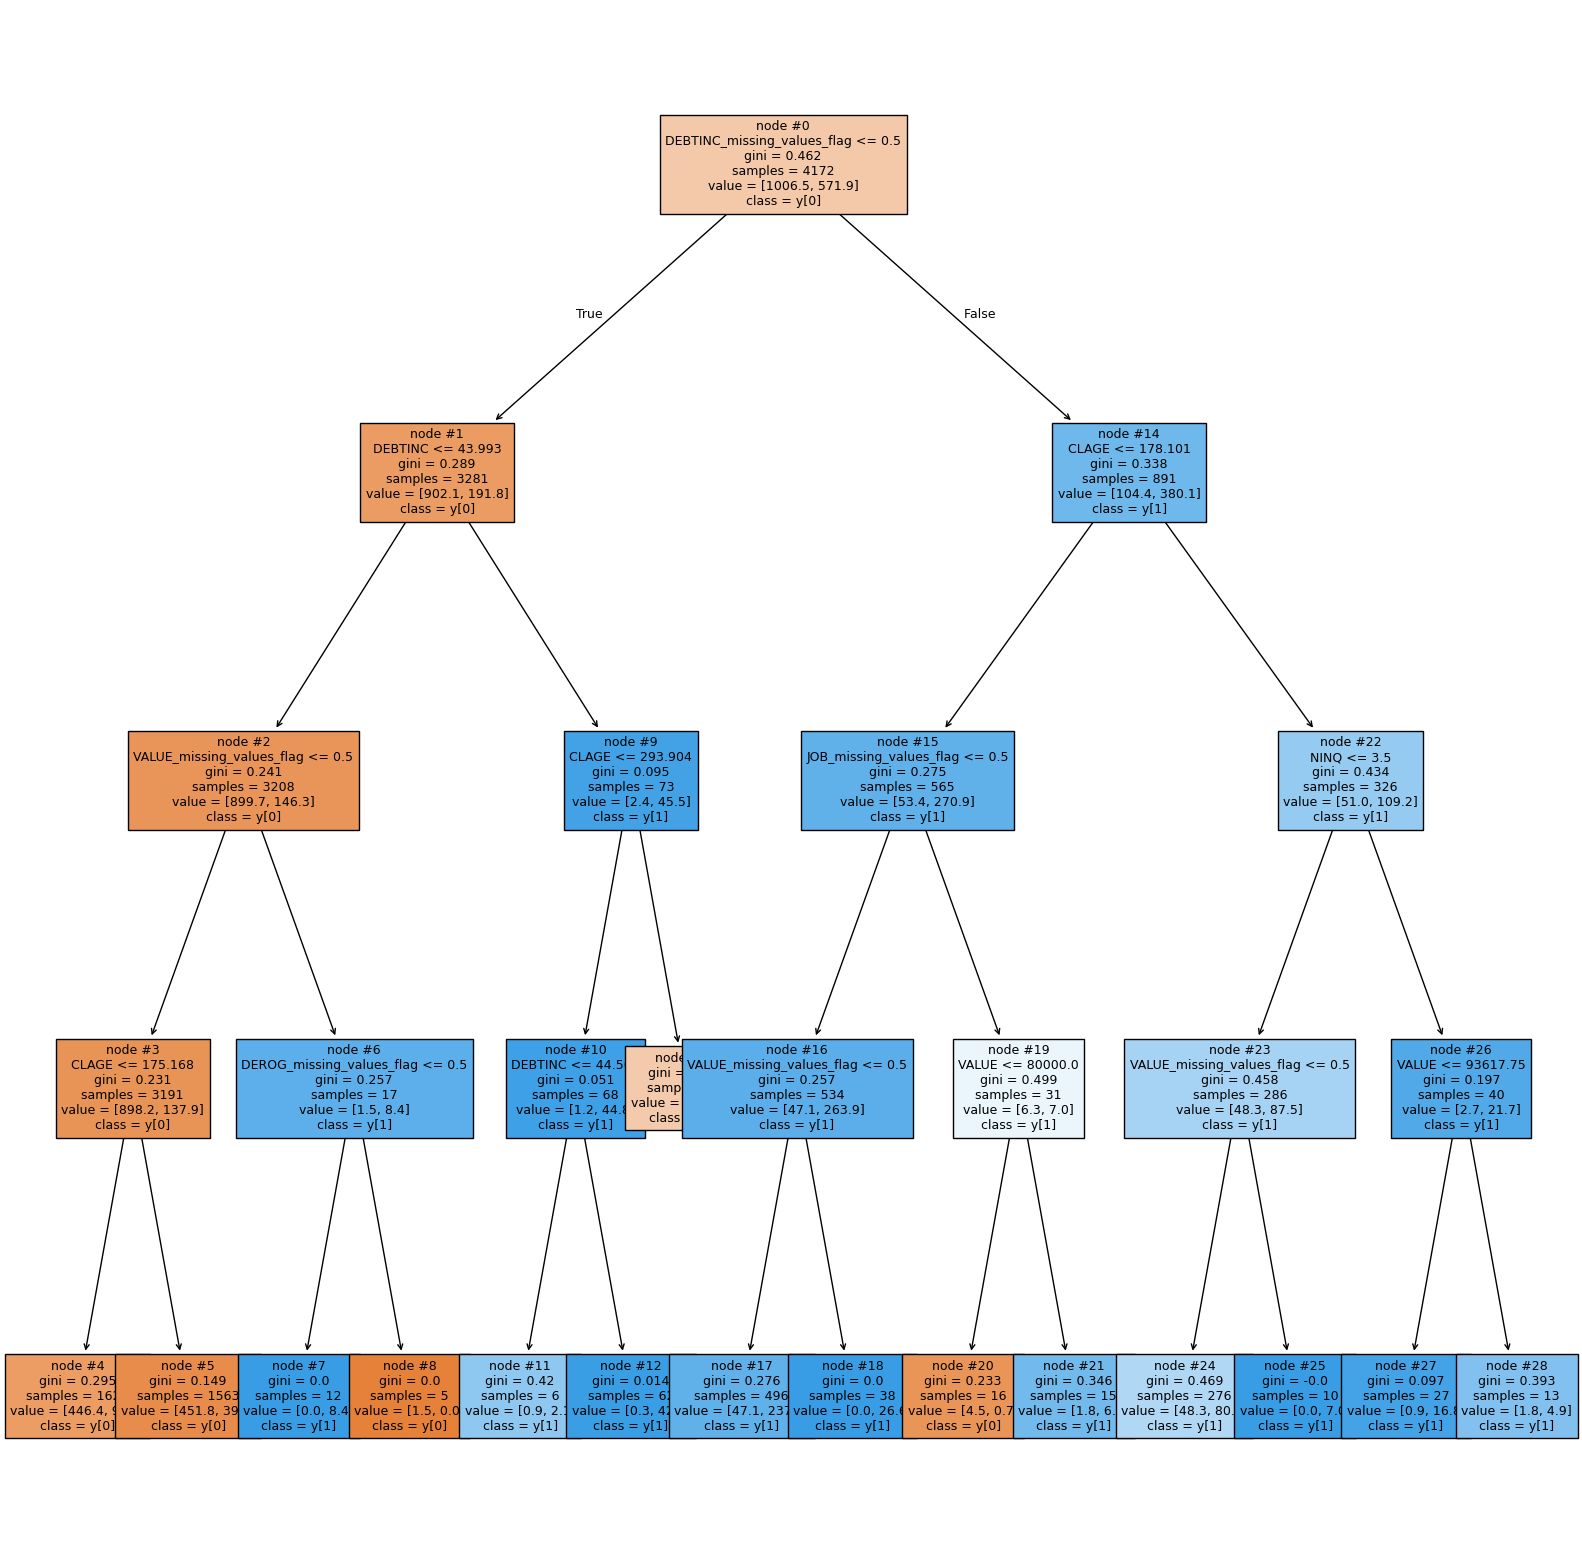

In [139]:
# Extracts all the column names as a list of features.
features = list(X.columns)
# Set figure size.
plt.figure(figsize = (20, 20))
# Plot the decision tree.
tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)
# Show the plot.
plt.show()

🔬 **Observation**

- **Key Predictor Variables**  
   - The most influential feature at the root of the tree is **`DEBTINC_missing_values_flag`**, indicating that the presence of missing values in Debt-to-Income ratio plays a critical role in classification.  
   - Other important features that appear frequently in splits are **`DEBTINC`**, **`CLAGE` (age of credit line)**, **`VALUE_missing_values_flag`**, and **`JOB_missing_values_flag`**.

- **Patterns from Splits**
   - When **`DEBTINC_missing_values_flag ≤ 0.5`** (no missing Debt-to-Income values):
     - If **`DEBTINC ≤ 43.99`**, most paths lead to **class 0** (good loan).  
     - If **`DEBTINC > 43.99`** and **`CLAGE ≤ 293.9`**, the model predicts **class 1** (bad loan).  
     - Extremely high `CLAGE` values (>293.9) revert to **class 0**.  
   - When **`DEBTINC_missing_values_flag > 0.5`** (missing Debt-to-Income values):  
     - Outcomes depend on **`CLAGE`**, **`JOB_missing_values_flag`**, and **`VALUE`**.  
     - In many branches, predictions lean towards **class 1** (bad loan), especially when missing data overlaps with high or undefined credit values.

- **Role of Missing Values**  
   - Missing value flags (`DEBTINC_missing_values_flag`, `VALUE_missing_values_flag`, `JOB_missing_values_flag`) are highly predictive.  
   - This suggests that the absence of financial information correlates strongly with loan risk.

- **Overall Trends**
   - **Low Debt-to-Income ratios** (≤ 43.99) generally indicate **good loans** (class 0).  
   - **High Debt-to-Income ratios** (> 43.99), especially with **low-to-moderate credit age (CLAGE ≤ 293.9)**, increase the likelihood of **bad loans** (class 1).  
   - Applicants with **missing financial data** tend to be classified as **higher risk** (class 1).  

##### **3.2. Feature Importance**

In [153]:
# Print importance of features in the tree building.
print(pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
DEBTINC_missing_values_flag 0.72183
DEBTINC                     0.17549
VALUE_missing_values_flag   0.03835
CLAGE                       0.03318
VALUE                       0.00892
JOB_missing_values_flag     0.00767
DEROG_missing_values_flag   0.00737
NINQ                        0.00719
CLAGE_missing_values_flag   0.00000
JOB_Sales                   0.00000
JOB_ProfExe                 0.00000
JOB_Other                   0.00000
JOB_Office                  0.00000
REASON_HomeImp              0.00000
CLNO_missing_values_flag    0.00000
NINQ_missing_values_flag    0.00000
LOAN                        0.00000
DELINQ_missing_values_flag  0.00000
YOJ_missing_values_flag     0.00000
MORTDUE                     0.00000
REASON_missing_values_flag  0.00000
MORTDUE_missing_values_flag 0.00000
CLNO                        0.00000
DELINQ                      0.00000
DEROG                       0.00000
YOJ                         0.00000
JOB_Self                    

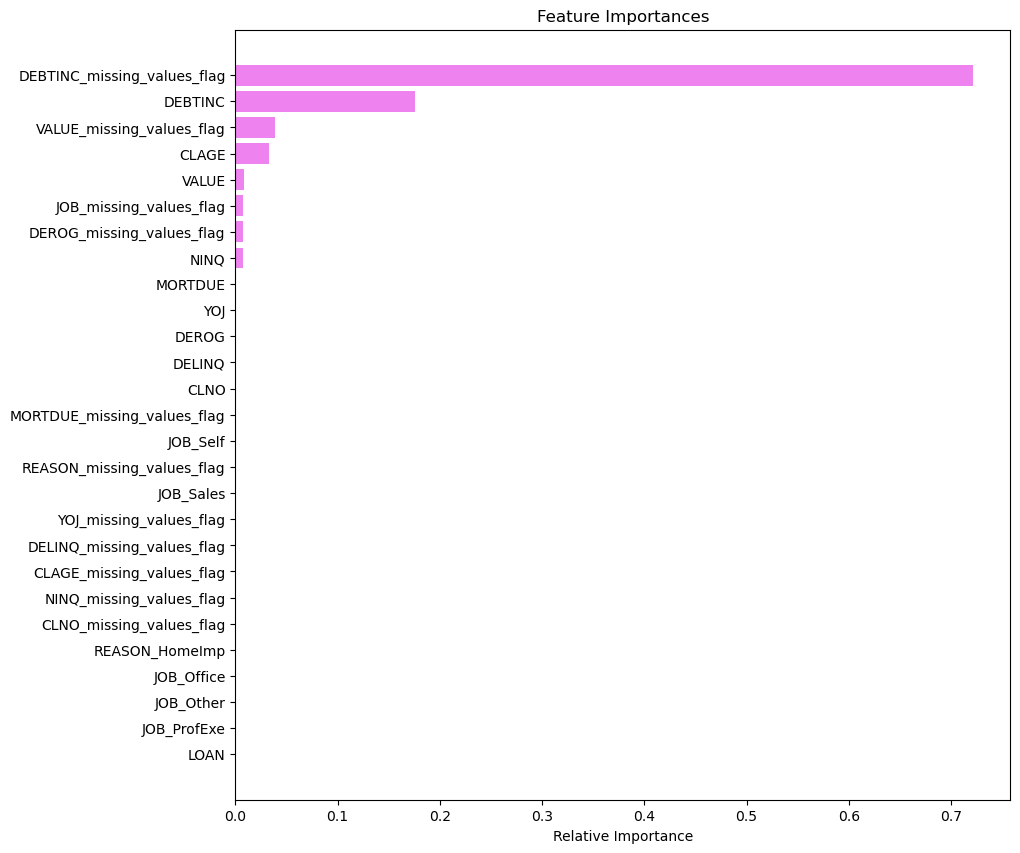

In [155]:
# Get importance data.
importances = d_tree_tuned.feature_importances_
# Get the indices of the importances.
indices = np.argsort(importances)
# Set figure size.
plt.figure(figsize = (10, 10))
# Set the title.
plt.title('Feature Importances')
# Set each bar.
plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')
# Set the y ticks.
plt.yticks(range(len(indices)), [features[i] for i in indices])
# Set the x label.
plt.xlabel('Relative Importance')
# Show the plot.
plt.show()

🔬 **Observations**

- **DEBTINC_missing_values_flag** (0.72183) is by far the most important feature, indicating that missing values in `DEBTINC` carry strong predictive power for the target variable.
- **DEBTINC** itself (0.17549) also has high importance, suggesting that debt-to-income ratio is a strong predictor of default.
- **VALUE_missing_values_flag** (0.03835) and **CLAGE** (0.03318) contribute moderately, showing some relationship with default risk.
- **VALUE** (0.00892), **JOB_missing_values_flag** (0.00767), **DEROG_missing_values_flag** (0.00737), and **NINQ** (0.00719) have minor but non-zero contributions.
- Many features (e.g., `CLNO`, `DELINQ`, `MORTDUE`, `YOJ`, `JOB` categories, `REASON` categories) show **zero importance**, meaning the tuned decision tree model did not find them useful for splitting.

---

⚠️ **Key Takeaways**  
The model heavily relies on missing value flags—especially for `DEBTINC`—which may suggest that the pattern of missingness is correlated with default risk. This warrants further investigation to ensure the model is not simply exploiting data quality issues instead of meaningful financial signals.

### **iv. Random Forest**

#### **1. Modelling**

In [166]:
# Create a Random Forest Tree Classifier model.
rf_estimator = RandomForestClassifier(random_state = 7, criterion = "entropy")
# Fit the classifier on the training data.
rf_estimator.fit(X_train,y_train)

,n_estimators,100
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



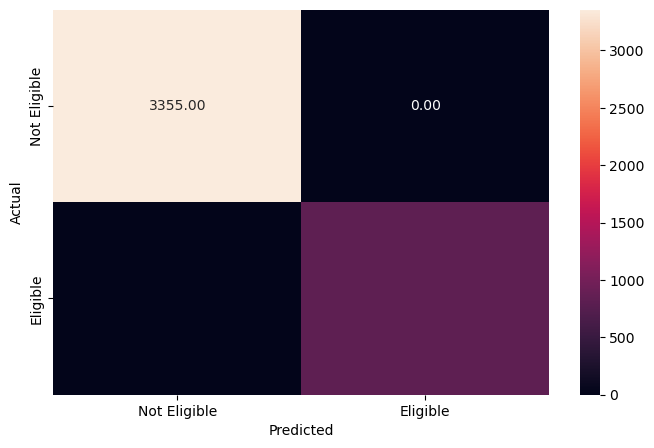

In [168]:
# Predict based on training data.
y_pred_train3 = rf_estimator.predict(X_train)
# Evaluate the model.
get_metrics_score(y_train, y_pred_train3)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1416
           1       0.80      0.63      0.70       372

    accuracy                           0.89      1788
   macro avg       0.85      0.79      0.82      1788
weighted avg       0.88      0.89      0.88      1788



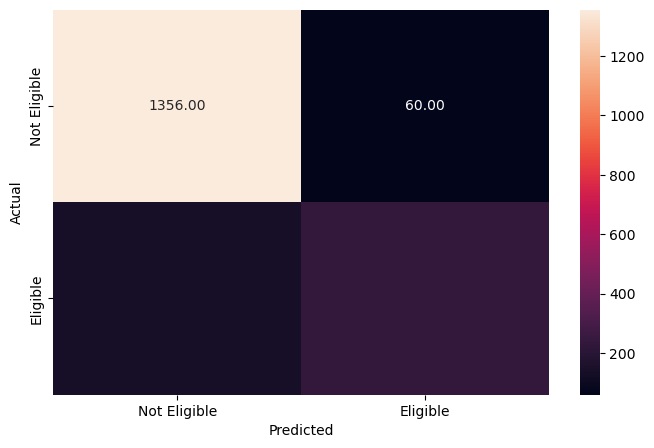

In [170]:
# Predict based on test data.
y_pred_test3 = rf_estimator.predict(X_test)
# Evaluate the model.
get_metrics_score(y_test, y_pred_test3)

🔬 **Observations**

- **Training Performance:** The model achieves perfect scores on the training data (precision, recall, and F1-score all 1.00), indicating that it has fully memorized the training set. This is typical for ensemble models like random forests with enough trees and depth.  
- **Test Performance:** On the test data, the model performs well with overall accuracy of 0.89.  
  - Class 0 (non-default) is predicted very accurately with 0.91 precision and 0.96 recall.  
  - Class 1 (default) is predicted with lower recall (0.63) but decent precision (0.80), suggesting the model is better at identifying non-defaulters than defaulters.  
- **Macro Average Metrics:** The macro average F1-score is 0.82, indicating good balance between the two classes, though some underperformance exists for the minority class (defaults).  
- **Key Insight:** The Random Forest improves over a single decision tree by reducing overfitting slightly on test data while maintaining high predictive power. However, recall for class 1 could still be improved for better detection of defaulters.

#### **2. Hyperparameter Tuning**

In [174]:
# Choose the type of classifier.
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)
# Set parameters.
parameters = {"n_estimators": [110, 120], "max_depth": [6, 7], "min_samples_leaf": [20, 25], "max_features": [0.8, 0.9], "max_samples": [0.9, 1], "class_weight": ["balanced",{0: 0.3, 1: 0.7}]}
# Set the type of scoring to compare parameter combinations.
scorer = metrics.make_scorer(recall_score, pos_label = 1)
# Initialize GridSearchCV with the tuned decision tree.
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=scorer, cv=5)
# Fit the grid search object on the training data to find the best hyperparameters.
grid_obj = grid_obj.fit(X_train, y_train)
# Set the classifier to the best combination of parameters.
rf_estimator_tuned = grid_obj.best_estimator_
# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

,n_estimators,110
,criterion,'entropy'
,max_depth,7
,min_samples_split,2
,min_samples_leaf,20
,min_weight_fraction_leaf,0.0
,max_features,0.9
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


              precision    recall  f1-score   support

           0       0.94      0.89      0.92      3355
           1       0.63      0.77      0.70       817

    accuracy                           0.87      4172
   macro avg       0.79      0.83      0.81      4172
weighted avg       0.88      0.87      0.87      4172



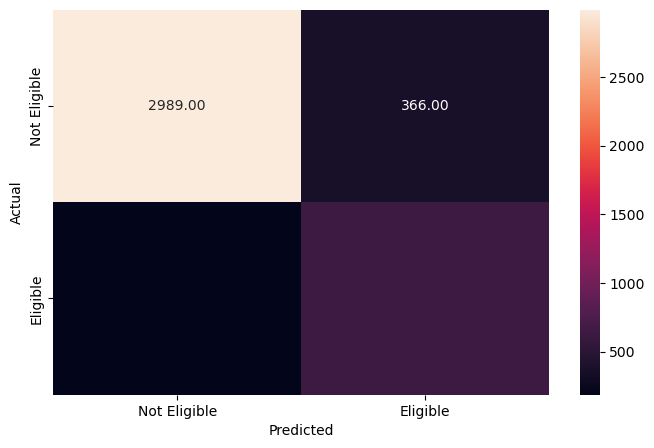

In [175]:
# Predict based on training data.
y_pred_train4 = rf_estimator_tuned.predict(X_train)
# Evaluate the model.
get_metrics_score(y_train, y_pred_train4)

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1416
           1       0.65      0.72      0.68       372

    accuracy                           0.86      1788
   macro avg       0.79      0.81      0.80      1788
weighted avg       0.87      0.86      0.86      1788



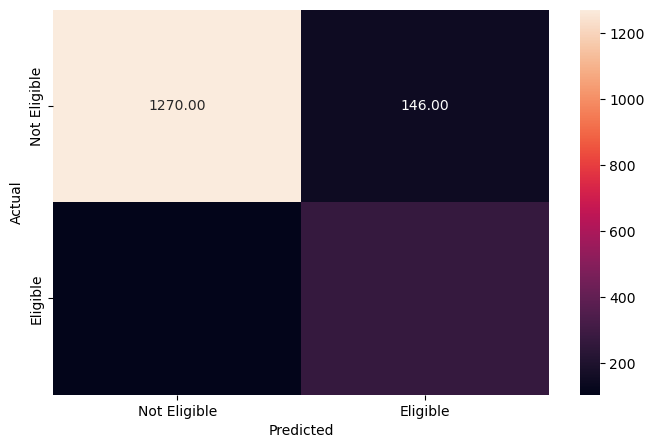

In [176]:
# Predict based on test data.
y_pred_test4 = rf_estimator_tuned.predict(X_test)
# Evaluate the model.
get_metrics_score(y_test, y_pred_test4)

🔬 **Observations**

- **Training Performance:**  
  - Accuracy slightly decreased to 0.87 compared to the untuned model, which indicates that the tuning has reduced overfitting.  
  - Class 0 (non-default) has precision 0.94 and recall 0.89.  
  - Class 1 (default) has precision 0.63 and recall 0.77, showing an improvement in recall for detecting defaults compared to the untuned model.  
  - Weighted F1-score is 0.87, showing overall strong performance on the training set.

- **Test Performance:**  
  - Accuracy on test data is 0.86, slightly lower than untuned model, but metrics are more balanced between classes.  
  - Class 0: precision 0.92, recall 0.90, F1-score 0.91.  
  - Class 1: precision 0.65, recall 0.72, F1-score 0.68.  
  - Macro average F1-score is 0.80, indicating better recognition of the minority class compared to the untuned model.

---

⚠️ **Key Takeaway**
- Hyperparameter tuning helped reduce overfitting while improving the recall for class 1 (defaults). The model is now better balanced between detecting defaulters and non-defaulters, though class 1 detection can still be improved.

#### **3. Visualization**

In [182]:
# Print importance of features in the forest building.
print(pd.DataFrame(rf_estimator_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
DEBTINC_missing_values_flag 0.48746
DEBTINC                     0.24155
CLAGE                       0.07490
VALUE                       0.03740
LOAN                        0.03218
MORTDUE                     0.02467
YOJ                         0.02446
NINQ                        0.02267
CLNO                        0.02041
VALUE_missing_values_flag   0.00954
DEROG_missing_values_flag   0.00712
JOB_missing_values_flag     0.00459
JOB_ProfExe                 0.00332
JOB_Other                   0.00289
JOB_Office                  0.00186
REASON_HomeImp              0.00179
DELINQ_missing_values_flag  0.00113
NINQ_missing_values_flag    0.00067
MORTDUE_missing_values_flag 0.00062
YOJ_missing_values_flag     0.00047
CLNO_missing_values_flag    0.00023
REASON_missing_values_flag  0.00004
CLAGE_missing_values_flag   0.00004
DELINQ                      0.00000
DEROG                       0.00000
JOB_Sales                   0.00000
JOB_Self                    

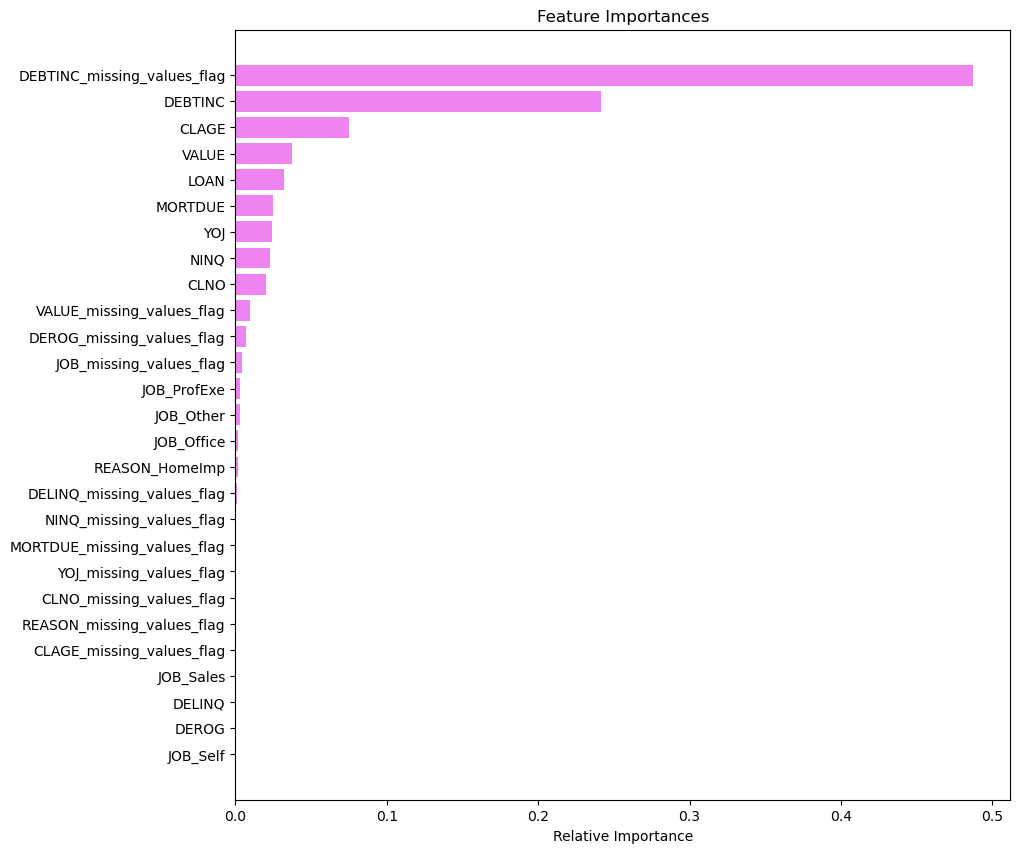

In [184]:
# Get importance data.
importances = rf_estimator_tuned.feature_importances_
# Get the indices of the importances.
indices = np.argsort(importances)
# Extracts all the column names as a list of features.
features = list(X.columns)
# Set figure size.
plt.figure(figsize = (10, 10))
# Set the title.
plt.title('Feature Importances')
# Set each bar.
plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')
# Set the y ticks.
plt.yticks(range(len(indices)), [features[i] for i in indices])
# Set the x label.
plt.xlabel('Relative Importance')
# Show the plot.
plt.show()

🔬 **Observations**

- **Most Important Features:**
  - `DEBTINC_missing_values_flag` (0.48746) is by far the most influential feature, indicating that missingness in debt-to-income ratio is highly predictive of default.
  - `DEBTINC` itself (0.24155) is the next most important, confirming that higher debt-to-income ratios increase default risk.
  - `CLAGE` (0.07490) and `VALUE` (0.03740) also contribute meaningfully, showing that older credit history and property value affect predictions.
  - Loan amount (`LOAN`, 0.03218) and mortgage due (`MORTDUE`, 0.02467) have smaller but non-negligible impacts.

- **Moderately Important Features:**
  - `YOJ` (0.02446), `NINQ` (0.02267), and `CLNO` (0.02041) have moderate importance, reflecting the effect of years on the job, number of inquiries, and total number of credit lines.
  - Missing flags like `VALUE_missing_values_flag` (0.00954) and `DEROG_missing_values_flag` (0.00712) indicate that missing information can influence the model, but less so than the actual numeric values.

- **Least Important / Negligible Features:**
  - Job categories (`JOB_*`), reason flags (`REASON_*`), and other missing flags have minimal influence, mostly below 0.005.
  - Features like `DELINQ`, `DEROG`, `JOB_Sales`, and `JOB_Self` have zero importance, suggesting that they do not contribute to model decisions.

---

⚠️ **Key Takeaway**

- The Random Forest model heavily relies on the **debt-to-income ratio** and its missingness, along with credit age and property value, to predict defaults. Features with zero importance could potentially be removed to simplify the model without affecting performance.

### **v. Model Comparison**

🆚 **Comparison of Model Performance**

| Model                     | Dataset | Accuracy | Precision (0/1) | Recall (0/1) | F1-score (0/1) | Macro Avg | Weighted Avg |
|----------------------------|---------|---------|----------------|---------------|----------------|-----------|--------------|
| Logistic Regression        | Train   | 0.83    | 0.85 / 0.66    | 0.96 / 0.30   | 0.90 / 0.42    | 0.76      | 0.81         |
|                            | Test    | 0.82    | 0.83 / 0.69    | 0.97 / 0.27   | 0.90 / 0.39    | 0.76      | 0.80         |
| Decision Tree              | Train   | 1.00    | 1.00 / 1.00    | 1.00 / 1.00   | 1.00 / 1.00    | 1.00      | 1.00         |
|                            | Test    | 0.85    | 0.90 / 0.66    | 0.92 / 0.59   | 0.91 / 0.63    | 0.78      | 0.85         |
| Tuned Decision Tree        | Train   | 0.87    | 0.94 / 0.65    | 0.90 / 0.76   | 0.92 / 0.70    | 0.79      | 0.88         |
|                            | Test    | 0.87    | 0.93 / 0.66    | 0.90 / 0.73   | 0.91 / 0.69    | 0.80      | 0.87         |
| Random Forest              | Train   | 1.00    | 1.00 / 1.00    | 1.00 / 1.00   | 1.00 / 1.00    | 1.00      | 1.00         |
|                            | Test    | 0.89    | 0.91 / 0.80    | 0.96 / 0.63   | 0.93 / 0.70    | 0.85      | 0.88         |
| Tuned Random Forest        | Train   | 0.87    | 0.94 / 0.63    | 0.89 / 0.77   | 0.92 / 0.70    | 0.79      | 0.88         |
|                            | Test    | 0.86    | 0.92 / 0.65    | 0.90 / 0.72   | 0.91 / 0.68    | 0.79      | 0.86         |

🔬 **Key Observations**

- **Overfitting in Trees & Random Forests:**
   - Both Decision Tree and Random Forest achieve **perfect training scores**, indicating overfitting. The tuned versions reduce overfitting slightly.
   
- **Logistic Regression:**
   - More conservative model with lower recall for class 1 (default), showing that it struggles to identify defaulters.
   
- **Decision Tree vs Tuned Decision Tree:**
   - Tuning (max_depth, min_samples_leaf, criterion) improves **generalization** and reduces overfitting. Test accuracy improves from 0.85 → 0.87.
   
- **Random Forest vs Tuned Random Forest:**
   - Random Forest naturally generalizes better than a single Decision Tree. Hyperparameter tuning slightly reduces training performance but maintains test accuracy.
   
- **Class 1 Detection (Default):**
   - Tuned Decision Tree and Random Forest improve **recall for defaulters**, a critical metric for credit risk.
   
- **Feature Importance:**
   - Across tree-based models, **DEBTINC and DEBTINC_missing_values_flag** are consistently the most important features, followed by CLAGE and VALUE.

---
   
✅ **Best Model:**

- **Tuned Decision Tree** or **Random Forest** provides a good balance of **accuracy and recall** on test data without extreme overfitting, making them more reliable for predicting defaults.

## **V. Summary and Recommendations**

### **i. Summary**

In this project, we performed a comprehensive analysis of a credit risk dataset with the aim of predicting loan defaults (`BAD`). The project workflow included:

1. **Data Preprocessing and Cleaning**
   - Checked for missing values and created missing value flags.
   - Encoded categorical variables (`REASON`, `JOB`) using one-hot encoding.
   - Handled outliers and scaled numerical features where necessary.

2. **Exploratory Data Analysis**
   - Numerical features (`LOAN`, `MORTDUE`, `VALUE`, `YOJ`, `CLAGE`, `DEBTINC`) were analyzed for distribution, central tendency, and variability.
   - Categorical features (`REASON`, `JOB`) were analyzed with stacked bar plots to understand class distributions and their relationship with `BAD`.
   - Correlation and heatmaps revealed relationships among features, highlighting potential predictors for default.

3. **Model Building**
   - Multiple classification models were built to predict defaults:
     - Logistic Regression
     - Decision Tree
     - Tuned Decision Tree
     - Random Forest
     - Tuned Random Forest
   - Hyperparameter tuning was performed for tree-based models using `GridSearchCV` to improve generalization and recall for the default class (class 1).

4. **Model Evaluation**
   - Metrics used included **accuracy, precision, recall, F1-score**, and **feature importance**.
   - Observed class imbalance effects, especially in logistic regression, which struggled to identify defaulters (low recall for class 1).
   - Decision Trees and Random Forests overfit the training data but provided strong predictive performance on the test set after tuning.
   - Feature importance consistently highlighted `DEBTINC`, `DEBTINC_missing_values_flag`, `CLAGE`, and `VALUE` as the most important predictors.

### **ii. Key Findings**

1. **Best Performing Model:**  
   - The **Tuned Decision Tree** and **Random Forest** showed the best trade-off between test accuracy and recall for defaulters.
   - Logistic Regression, while simpler, underperformed in identifying defaults due to low recall for class 1.

2. **Feature Insights:**  
   - Debt-to-income ratio (`DEBTINC`) and its missing value flag were the most critical features, emphasizing financial stability as the key factor for defaults.
   - Age of credit history (`CLAGE`) and property value (`VALUE`) also contributed significantly.
   - Categorical features like `REASON` and `JOB` had minor effects after encoding.

3. **Overfitting Considerations:**  
   - Untuned Decision Trees and Random Forests overfit the training data completely (F1-score = 1.0), highlighting the importance of hyperparameter tuning.
   - Grid search tuning improved test set generalization, balancing precision and recall.

### **iii. Recommendations**

1. **Model Selection:**  
   - Use **Tuned Decision Tree** or **Random Forest** for deployment to predict defaults, as they offer the best combination of recall for defaulters and overall accuracy.

2. **Feature Monitoring:**  
   - Monitor critical features like `DEBTINC` and `CLAGE` in real-time to ensure model stability.
   - Regularly update missing value flags to reflect changes in data collection.

3. **Future Work:**  
   - Explore **ensemble techniques** like Gradient Boosting or XGBoost for potentially higher predictive power.
   - Incorporate more demographic and behavioral features if available to improve recall for high-risk borrowers.
   - Implement **cost-sensitive learning** or **resampling strategies** to address class imbalance further and reduce false negatives for defaulters.

### **iv. Conclusion**

This project successfully developed predictive models for credit risk assessment using a combination of statistical and machine learning techniques. The findings reinforce the importance of financial metrics in default prediction and demonstrate how tree-based models, especially when tuned, can achieve high predictive performance while maintaining interpretability. These models can assist financial institutions in making informed lending decisions and managing risk more effectively.